In [1]:
states = ['LA', 'MS', 'AL', 'GA']
level = 'blockgroup'
district_types = ['SS','SH']
minority = 'Black'
deviation = 0.10      # 0.10 means 10% means +/-5%
total_steps = 100000 # SHORT BURST STEPS
burst_length = 10
num_bursts = round( total_steps / burst_length )

In [2]:
from gerrychain import (GeographicPartition, Partition, Graph, MarkovChain,
                        proposals, updaters, accept, Election)
from gerrychain import constraints as constraints_class
from gerrychain.optimization import SingleMetricOptimizer, Gingleator
from functools import partial
import pandas as pd
import json
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import random

random.seed(2024)

In [3]:
import math
import networkx as nx

from number_of_districts import number_of_districts
from complete import recursive_bipartition_heuristic
from district import get_census_codes
from metrics import number_of_counties_split, number_of_county_splits, average_polsby_popper, report_metrics

codes = get_census_codes(minority)
filepath = 'C://districting-data-2020//'

Effectively using k, L, U = 39 113459 125401
Using one split county, attempting to bipartition cluster into sizes: 19 20
Set parameter Username
Academic license - for non-commercial use only - expires 2025-04-16


C:\Users\buchanan\OneDrive - Oklahoma A and M System\Code\polsby_popper_polished\Polsby_Popper_optimization\src\revision\district.py:179: DeprecationWarning: Calling quicksum on a tupledict is deprecated, use .sum() instead.
  m.addConstr( gp.quicksum( is_split ) <= split_counties_limit )


Using one split county, attempting to bipartition cluster into sizes: 10 10
Using one split county, attempting to bipartition cluster into sizes: 5 5
Using one split county, attempting to bipartition cluster into sizes: 2 3
Using one split county, attempting to bipartition cluster into sizes: 1 2
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartition cluster into sizes: 2 3
Using one split county, attempting to bipartition cluster into sizes: 1 2
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartition cluster into sizes: 5 5
Using one split county, attempting to bipartition cluster into sizes: 2 3
Using one split county, attempting to bipartition cluster into sizes: 1 2
Using one split county, attempting t

 87%|███████████████████████████████████████████████████████████████▌         | 87077/100000 [1:08:28<09:04, 23.73it/s]C:\Users\buchanan\AppData\Local\anaconda3\Lib\site-packages\gerrychain\tree.py:704: BipartitionWarning: 
Failed to find a balanced cut after 1000 attempts.
If possible, consider enabling pair reselection within your
MarkovChain proposal method to allow the algorithm to select
a different pair of districts for recombination.
  warnings.warn(
100%|████████████████████████████████████████████████████████████████████████| 100000/100000 [1:18:41<00:00, 21.18it/s]


i gingles pp s1 s2
0 4.4637 0.3172 26 39
1000 7.4475 0.1848 53 102
2000 9.4415 0.1983 48 97
3000 9.4927 0.2082 51 100
4000 9.4993 0.1986 47 96
5000 10.4403 0.186 50 98
6000 10.4618 0.2054 49 105
7000 10.4618 0.1973 50 96
8000 10.4632 0.2028 49 105
9000 10.4632 0.1842 49 99
10000 10.4632 0.2206 44 86
11000 10.4823 0.2129 52 95
12000 11.4035 0.1942 50 103
13000 11.425 0.1865 51 99
14000 11.435 0.2007 44 102
15000 11.435 0.2065 50 103
16000 11.4362 0.1844 50 98
17000 11.4362 0.1964 50 100
18000 11.4372 0.2115 49 100
19000 11.4401 0.2026 48 96
20000 11.4402 0.2055 51 104
21000 11.4424 0.2124 48 105
22000 11.444 0.1953 44 99
23000 11.444 0.1914 46 109
24000 11.4467 0.1883 51 99
25000 11.4467 0.1859 50 104
26000 11.4467 0.1888 53 101
27000 11.4467 0.2026 55 109
28000 11.4467 0.1825 52 106
29000 11.4467 0.2122 53 108
30000 11.4467 0.1788 52 101
31000 11.4467 0.1884 50 99
32000 11.4494 0.1928 50 105
33000 11.4529 0.1931 49 99
34000 11.4529 0.1917 50 104
35000 11.4529 0.1968 50 104
36000 11.452

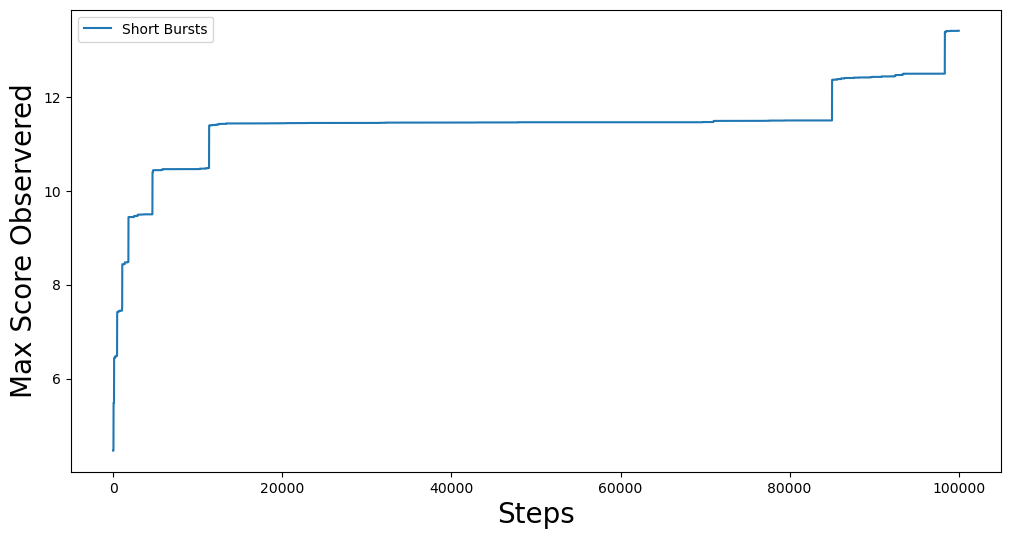

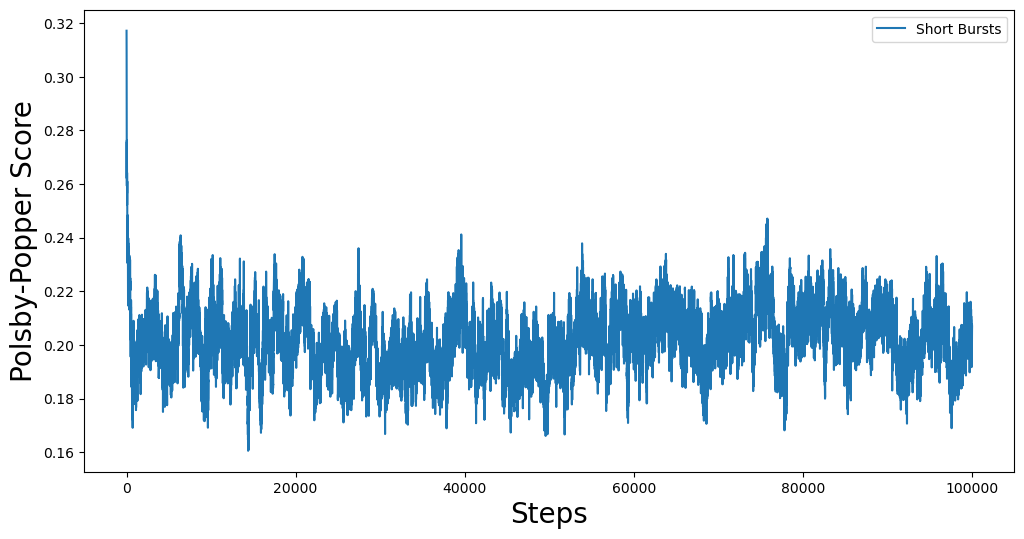

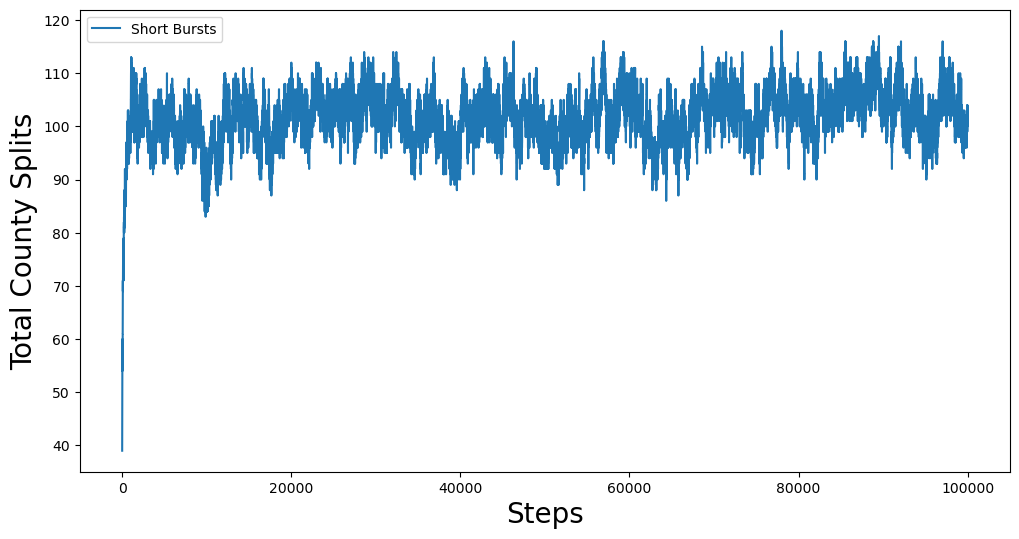

***************************
Starting LA SS
Region-aware: True
***************************


100%|████████████████████████████████████████████████████████████████████████| 100000/100000 [1:08:56<00:00, 24.17it/s]


i gingles pp s1 s2
0 4.4637 0.3172 26 39
1000 8.4713 0.2892 29 48
2000 8.4822 0.2825 23 41
3000 8.4877 0.262 28 50
4000 8.4888 0.286 28 48
5000 8.4937 0.2805 28 50
6000 8.4937 0.2684 28 48
7000 8.4999 0.2662 26 48
8000 9.4581 0.2687 27 47
9000 9.469 0.2632 26 48
10000 9.48 0.2328 33 51
11000 9.48 0.2627 32 51
12000 9.48 0.2436 28 46
13000 9.4873 0.264 31 49
14000 10.3984 0.2658 30 49
15000 10.417 0.2738 30 47
16000 10.4566 0.2527 30 52
17000 10.4566 0.2598 27 47
18000 10.4566 0.2502 27 44
19000 10.4566 0.2531 25 48
20000 10.4566 0.2737 26 48
21000 10.4606 0.2538 28 52
22000 10.4606 0.2482 26 46
23000 10.4627 0.2612 33 54
24000 10.4723 0.2262 34 51
25000 10.4723 0.2231 32 55
26000 10.4723 0.2611 28 52
27000 10.4723 0.2389 35 57
28000 10.4969 0.2423 32 50
29000 10.4969 0.235 32 54
30000 10.4975 0.2331 30 51
31000 10.4975 0.2455 35 60
32000 10.4975 0.243 30 55
33000 10.4975 0.2471 29 55
34000 10.4975 0.236 32 53
35000 10.4975 0.2595 30 48
36000 10.4975 0.2337 32 51
37000 10.4975 0.2312 30

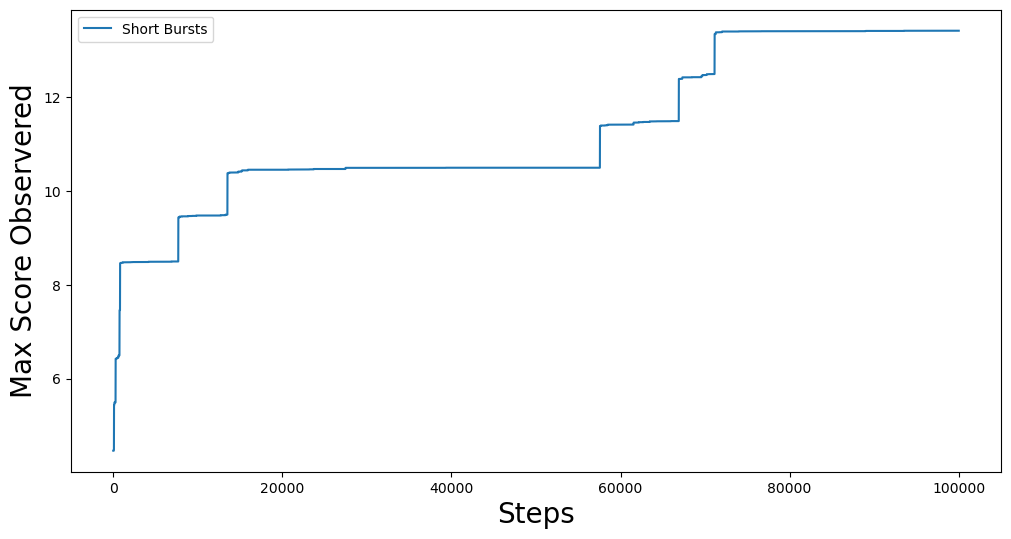

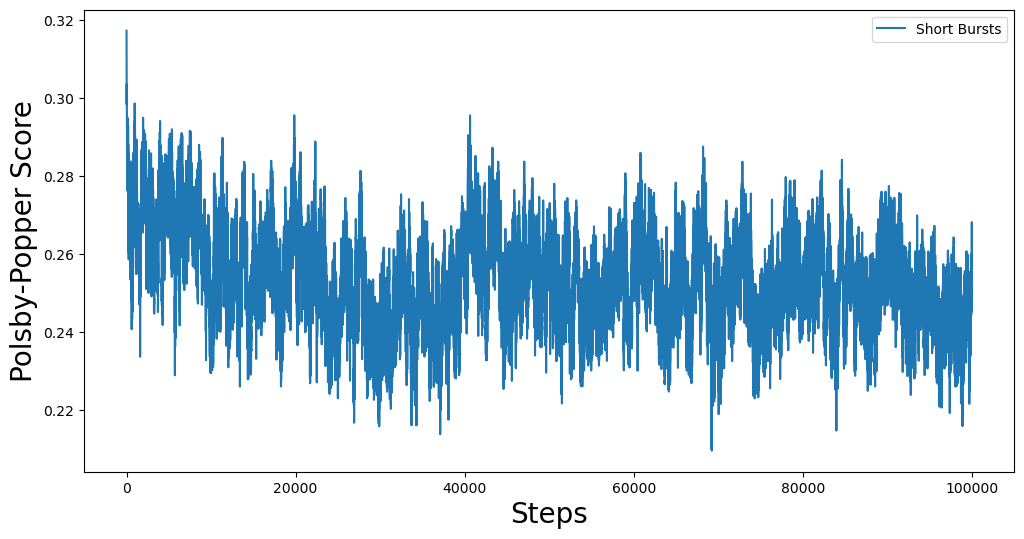

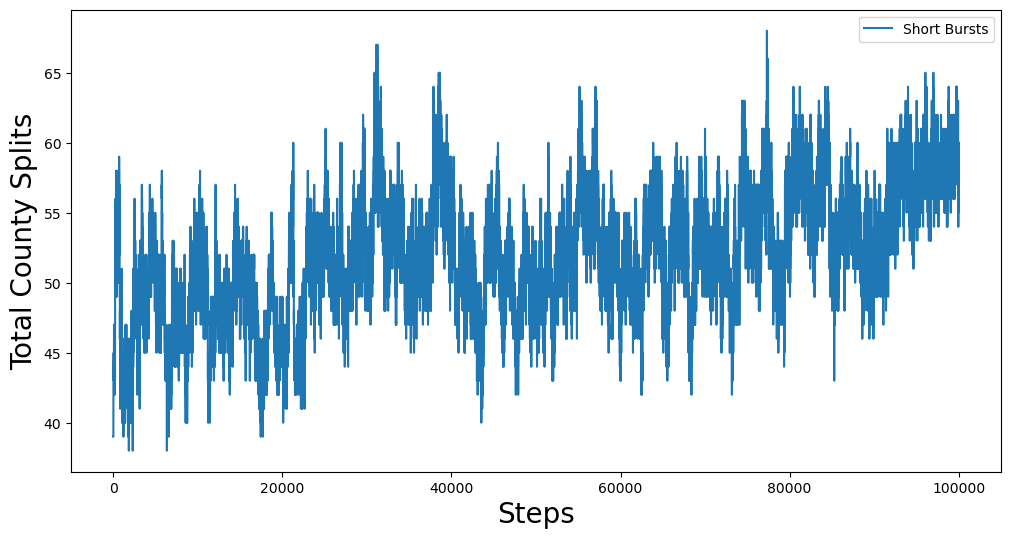

Effectively using k, L, U = 105 42142 46577
Using one split county, attempting to bipartition cluster into sizes: 52 53
Using one split county, attempting to bipartition cluster into sizes: 26 27
Using one split county, attempting to bipartition cluster into sizes: 13 14
Using one split county, attempting to bipartition cluster into sizes: 7 7
Using one split county, attempting to bipartition cluster into sizes: 3 4
Using one split county, attempting to bipartition cluster into sizes: 2 2
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartition cluster into sizes: 1 2
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartition cluster into sizes: 3 4
Using one split county, attempting to bipartition cluster into sizes: 2 2
Using one split county, attempting to bipartition cluster into

100%|██████████████████████████████████████████████████████████████████████████| 100000/100000 [45:55<00:00, 36.29it/s]


i gingles pp s1 s2
0 15.4951 0.3472 38 104
1000 22.4901 0.245 54 180
2000 23.4342 0.2285 53 181
3000 23.4827 0.2291 55 181
4000 25.4352 0.2334 58 193
5000 26.4247 0.2333 60 196
6000 27.4236 0.2417 56 186
7000 27.4884 0.2413 58 191
8000 28.4455 0.2354 57 188
9000 28.496 0.2325 59 189
10000 28.496 0.2399 58 193
11000 28.496 0.2485 58 199
12000 28.496 0.2516 56 192
13000 29.4579 0.2369 59 192
14000 30.4574 0.2272 60 190
15000 30.4831 0.2332 57 191
16000 30.4831 0.2317 60 192
17000 30.4831 0.2464 58 185
18000 31.4831 0.254 58 178
19000 31.4849 0.2481 60 186
20000 31.4987 0.2438 57 184
21000 31.4987 0.2439 59 189
22000 31.4987 0.2419 59 192
23000 31.4987 0.2387 60 195
24000 31.4987 0.2274 60 194
25000 31.4987 0.2422 59 193
26000 31.4987 0.243 57 187
27000 31.4987 0.2444 58 199
28000 32.4187 0.228 57 199
29000 32.4322 0.2362 58 194
30000 32.4747 0.2571 58 194
31000 32.4865 0.2305 58 199
32000 32.4865 0.2406 61 208
33000 32.4865 0.2477 60 201
34000 33.4098 0.2372 58 208
35000 33.4206 0.2294 5

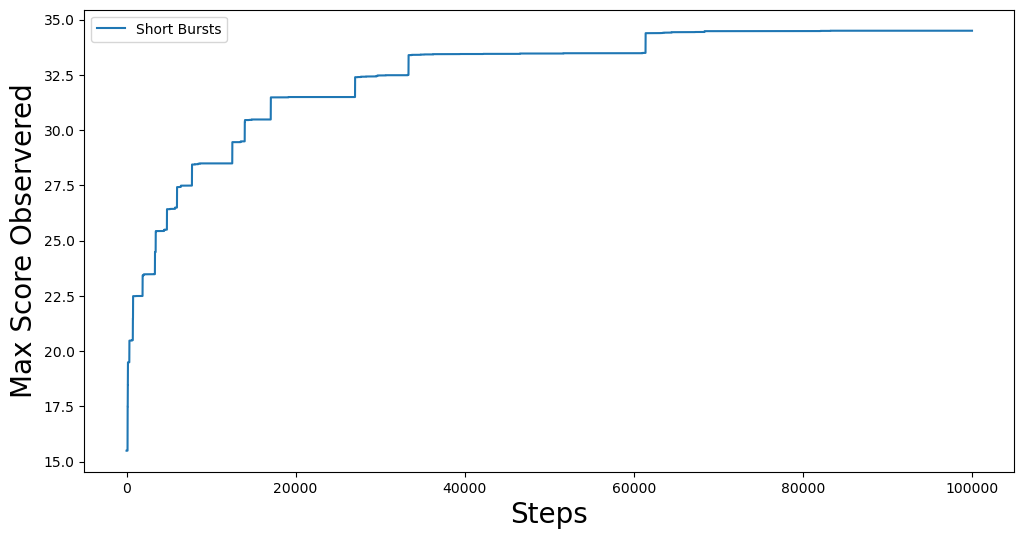

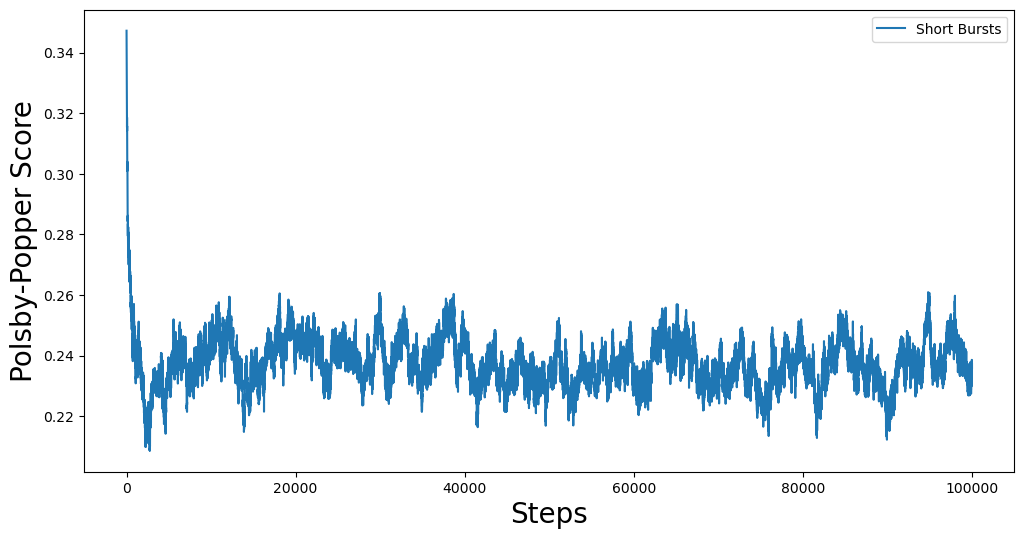

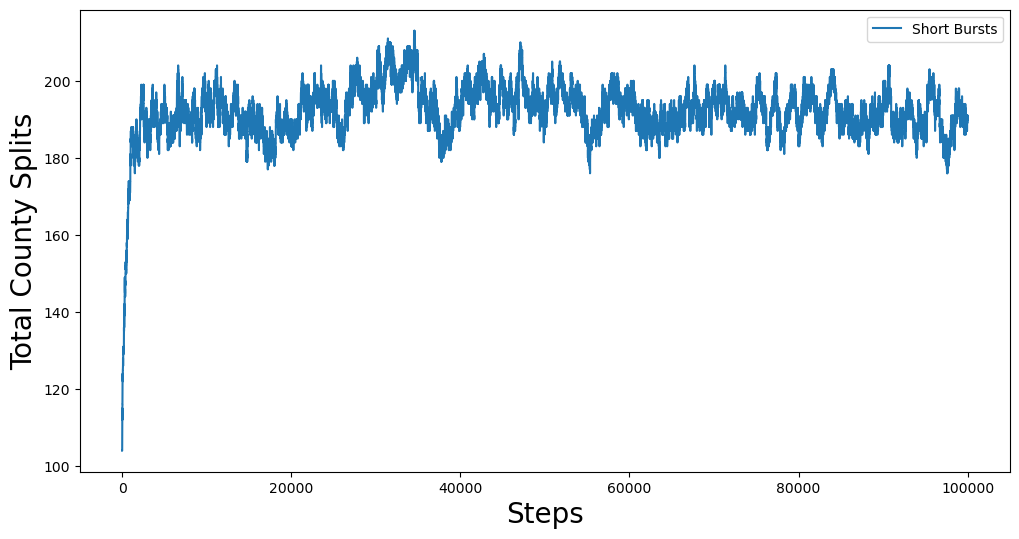

***************************
Starting LA SH
Region-aware: True
***************************


100%|██████████████████████████████████████████████████████████████████████████| 100000/100000 [43:55<00:00, 37.94it/s]


i gingles pp s1 s2
0 15.4951 0.3472 38 104
1000 21.4996 0.2825 42 111
2000 23.483 0.2775 39 112
3000 24.4835 0.2799 39 113
4000 25.4794 0.2917 37 114
5000 27.4947 0.2666 39 123
6000 27.4947 0.2622 39 122
7000 29.4046 0.2729 41 125
8000 29.414 0.2688 42 120
9000 29.441 0.2845 42 124
10000 29.4867 0.2825 44 127
11000 30.4121 0.2764 42 128
12000 30.436 0.2705 41 119
13000 30.436 0.2766 40 116
14000 30.484 0.2778 40 118
15000 30.4945 0.2743 42 119
16000 31.4196 0.2607 47 128
17000 31.4275 0.2671 40 125
18000 31.4437 0.2617 42 123
19000 31.459 0.2654 42 122
20000 31.459 0.2744 45 128
21000 31.459 0.2818 43 125
22000 31.459 0.2722 44 122
23000 31.459 0.2648 45 126
24000 31.4689 0.2728 42 121
25000 31.4689 0.2694 42 126
26000 31.4689 0.277 38 121
27000 31.4694 0.278 42 123
28000 31.4694 0.2671 42 124
29000 31.4694 0.2724 40 127
30000 31.4694 0.2517 42 126
31000 31.4747 0.2661 40 119
32000 31.4747 0.2726 42 118
33000 31.4979 0.2648 43 124
34000 31.4979 0.2719 42 124
35000 31.4979 0.272 41 123


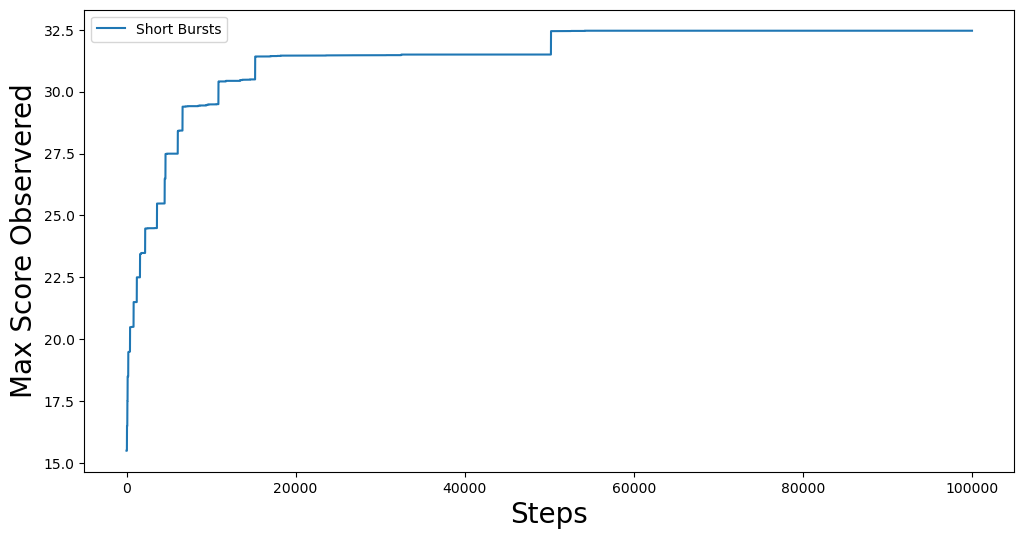

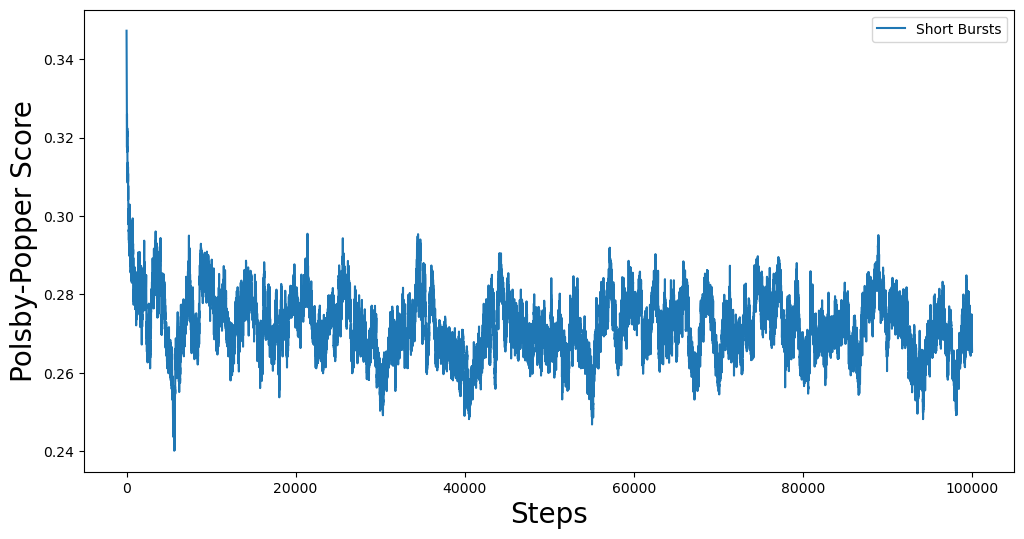

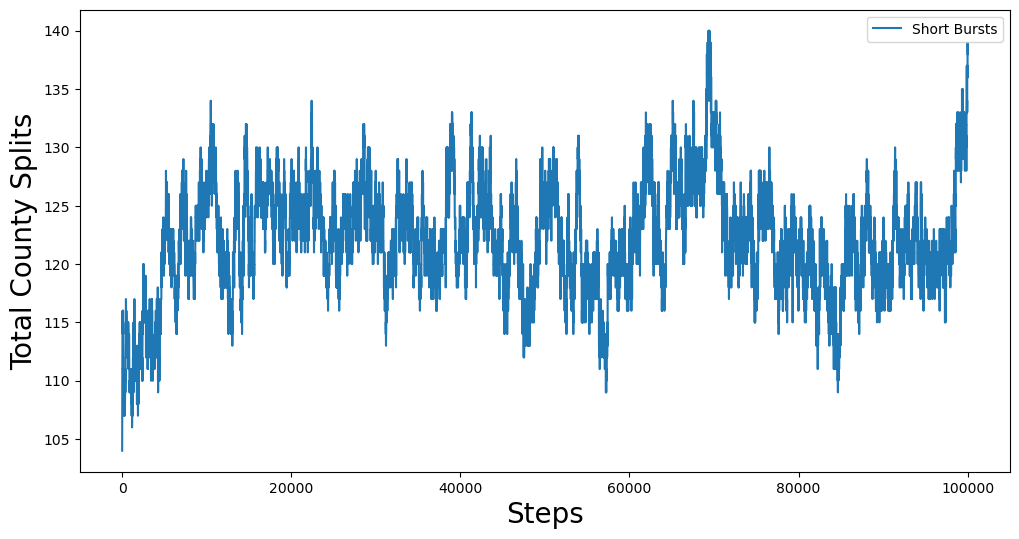

Effectively using k, L, U = 52 54101 59795
Using one split county, attempting to bipartition cluster into sizes: 26 26
Using one split county, attempting to bipartition cluster into sizes: 13 13
Using one split county, attempting to bipartition cluster into sizes: 6 7
Using one split county, attempting to bipartition cluster into sizes: 3 4
Using one split county, attempting to bipartition cluster into sizes: 2 2
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartition cluster into sizes: 1 2
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartition cluster into sizes: 3 3
Using one split county, attempting to bipartition cluster into sizes: 1 2
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartition cluster into si

100%|██████████████████████████████████████████████████████████████████████████| 100000/100000 [33:59<00:00, 49.03it/s]


i gingles pp s1 s2
0 10.4904 0.3636 31 47
1000 15.4871 0.2211 66 126
2000 16.4731 0.22 68 125
3000 17.4737 0.226 64 119
4000 18.4508 0.2268 67 122
5000 18.4508 0.216 64 119
6000 18.4582 0.2216 66 118
7000 18.4973 0.2064 68 133
8000 18.4996 0.215 71 136
9000 19.4292 0.218 65 121
10000 19.4563 0.2212 69 123
11000 19.4631 0.2236 65 121
12000 19.4659 0.2218 66 123
13000 19.4915 0.2132 65 118
14000 19.4915 0.2227 61 117
15000 19.4915 0.2315 69 125
16000 19.4941 0.2169 68 132
17000 19.4996 0.2051 71 137
18000 19.4996 0.2233 70 125
19000 19.4996 0.2242 64 122
20000 19.4996 0.2125 67 127
21000 19.4996 0.2196 69 130
22000 19.4996 0.2188 65 127
23000 20.4225 0.2307 67 121
24000 20.4225 0.2308 67 123
25000 20.4321 0.2177 68 123
26000 20.4321 0.2203 65 121
27000 20.4321 0.2085 66 127
28000 20.4321 0.2335 68 121
29000 20.4321 0.2044 71 127
30000 20.4321 0.212 70 117
31000 20.4429 0.2388 65 117
32000 20.4437 0.2238 65 121
33000 20.4508 0.2279 62 118
34000 20.4541 0.2063 69 117
35000 20.4541 0.2319 6

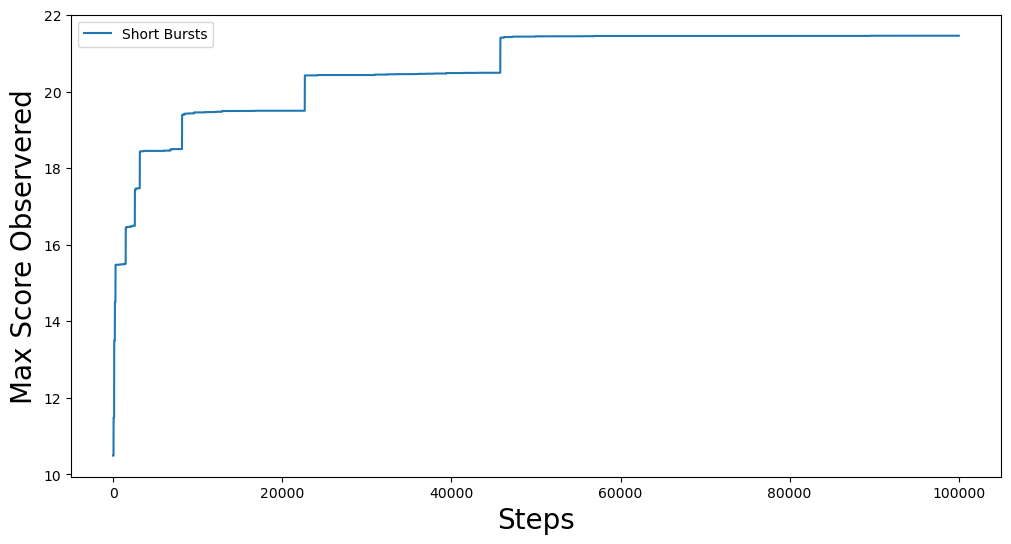

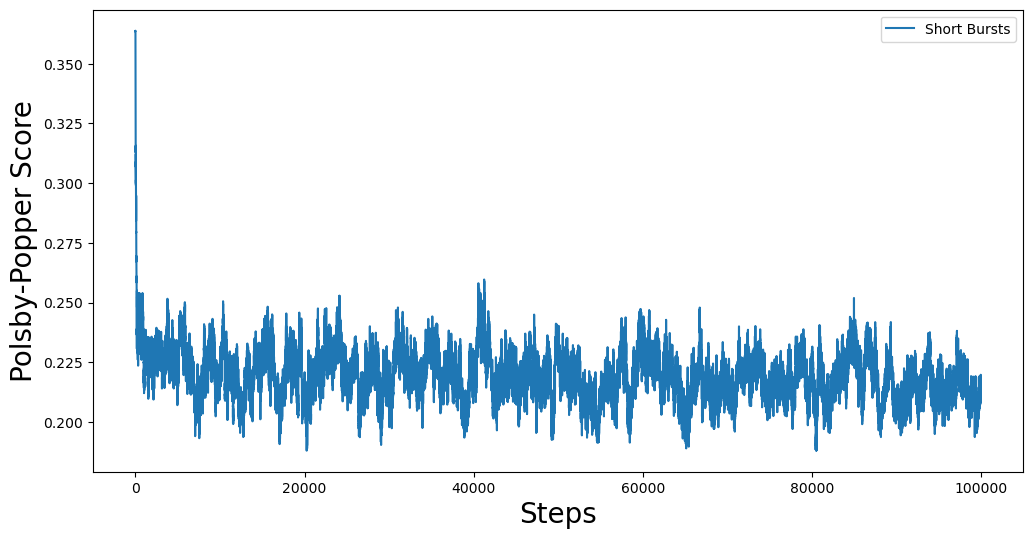

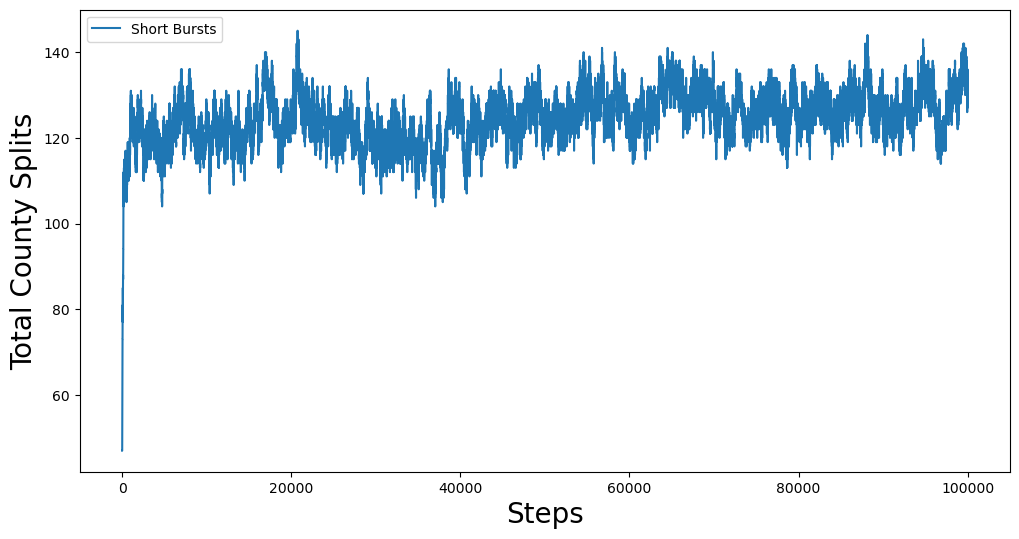

***************************
Starting MS SS
Region-aware: True
***************************


100%|██████████████████████████████████████████████████████████████████████████| 100000/100000 [32:20<00:00, 51.54it/s]


i gingles pp s1 s2
0 10.4904 0.3636 31 47
1000 15.4871 0.2968 30 48
2000 17.4266 0.2937 32 52
3000 17.4934 0.2984 31 52
4000 17.4983 0.2872 37 58
5000 18.4898 0.2901 35 61
6000 18.4898 0.296 39 61
7000 18.4898 0.2704 46 65
8000 18.4898 0.2785 37 60
9000 18.4898 0.3011 38 57
10000 18.4898 0.3167 32 52
11000 18.4898 0.304 32 56
12000 18.4898 0.296 31 53
13000 18.4899 0.3034 39 62
14000 18.4899 0.2815 39 60
15000 18.4899 0.3105 31 55
16000 18.4899 0.3287 35 53
17000 18.4899 0.2918 36 56
18000 18.4899 0.317 40 64
19000 18.4899 0.3182 33 53
20000 18.4912 0.2766 39 59
21000 18.4912 0.3088 36 57
22000 18.4912 0.2899 40 60
23000 18.4912 0.2816 36 58
24000 18.4912 0.2764 38 60
25000 18.4912 0.3101 36 53
26000 18.4956 0.2862 39 61
27000 18.4956 0.2878 41 66
28000 18.4956 0.2914 36 58
29000 18.4956 0.2768 43 67
30000 18.4956 0.3022 42 62
31000 18.4956 0.2699 45 68
32000 18.4956 0.281 37 60
33000 18.4956 0.2963 39 59
34000 18.4956 0.2778 38 59
35000 18.4956 0.2712 37 59
36000 18.4956 0.2778 35 58


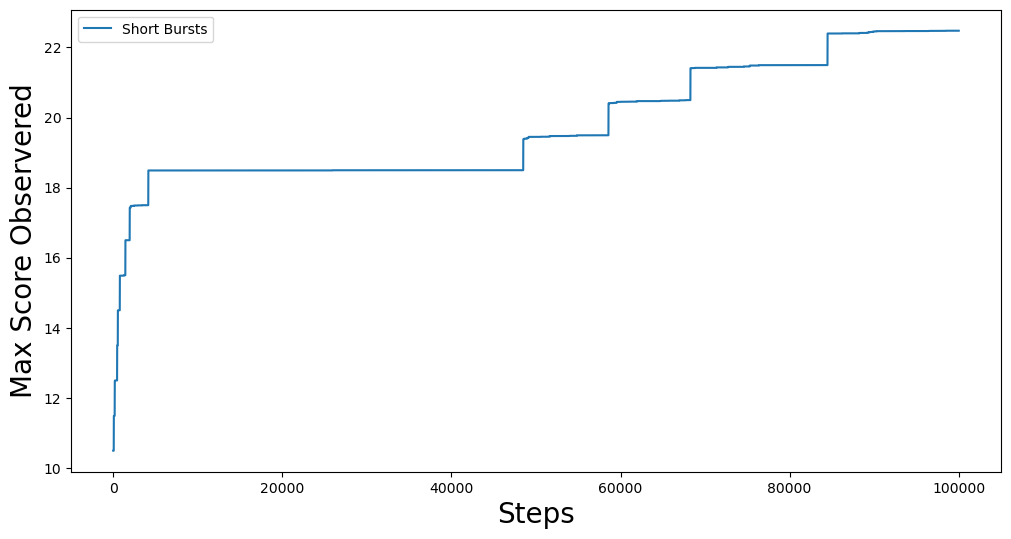

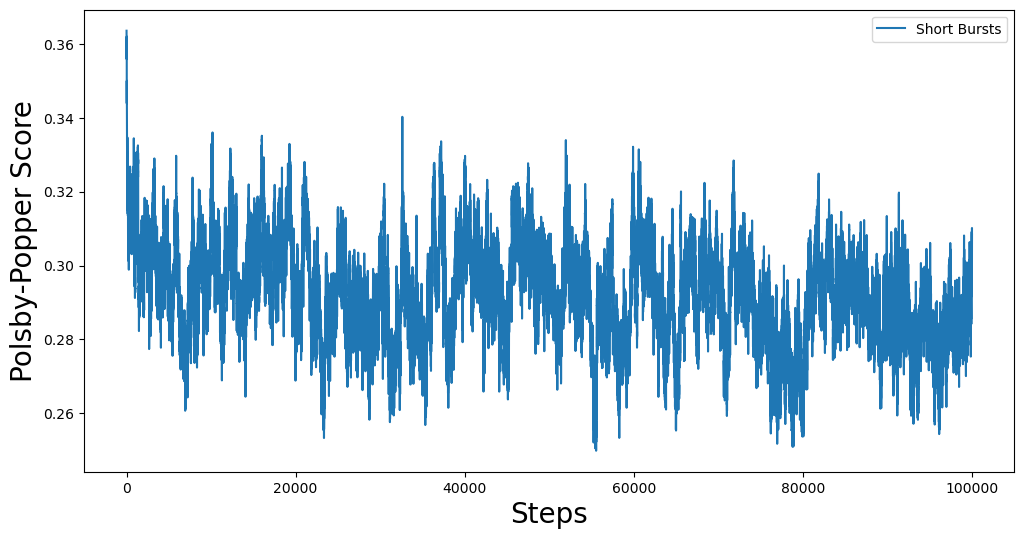

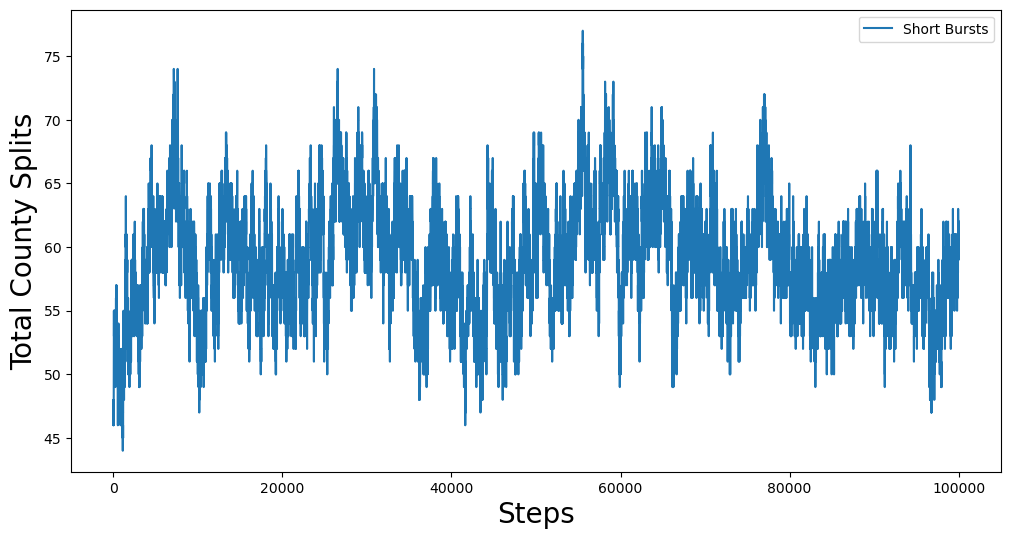

Effectively using k, L, U = 122 23060 25486
Using one split county, attempting to bipartition cluster into sizes: 61 61
Using one split county, attempting to bipartition cluster into sizes: 30 31
Using one split county, attempting to bipartition cluster into sizes: 15 16
Using one split county, attempting to bipartition cluster into sizes: 8 8
Using one split county, attempting to bipartition cluster into sizes: 4 4
Using one split county, attempting to bipartition cluster into sizes: 2 2
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartition cluster into sizes: 2 2
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartition cluster into sizes: 4 4
Using one split county, attempting to bipartition cluster into

100%|██████████████████████████████████████████████████████████████████████████| 100000/100000 [26:48<00:00, 62.17it/s]


i gingles pp s1 s2
0 27.499 0.3682 51 116
1000 37.4969 0.2923 71 181
2000 41.4882 0.267 72 191
3000 42.4982 0.2604 71 189
4000 42.4982 0.2811 70 197
5000 43.4505 0.2504 76 212
6000 43.4826 0.2534 76 204
7000 44.4826 0.2619 72 204
8000 44.4826 0.2578 75 198
9000 44.498 0.2613 75 204
10000 44.498 0.2553 79 207
11000 45.4357 0.2565 77 203
12000 45.4629 0.2602 76 202
13000 45.4885 0.262 77 211
14000 45.4885 0.2503 77 213
15000 45.498 0.2485 75 213
16000 46.4863 0.2475 78 216
17000 46.4943 0.2549 74 211
18000 47.4663 0.247 76 216
19000 47.4669 0.248 77 226
20000 47.4679 0.2533 76 218
21000 47.4761 0.2518 76 222
22000 48.435 0.2534 74 209
23000 48.471 0.2453 75 205
24000 48.4907 0.2494 75 210
25000 48.4971 0.2527 75 208
26000 49.4362 0.261 72 198
27000 49.4362 0.2571 76 203
28000 49.4362 0.2569 76 202
29000 49.4529 0.2524 78 209
30000 49.4529 0.2533 78 207
31000 49.4529 0.2667 73 198
32000 49.4529 0.2742 74 201
33000 49.4529 0.2732 78 203
34000 49.4529 0.2642 78 214
35000 49.4529 0.2521 77 2

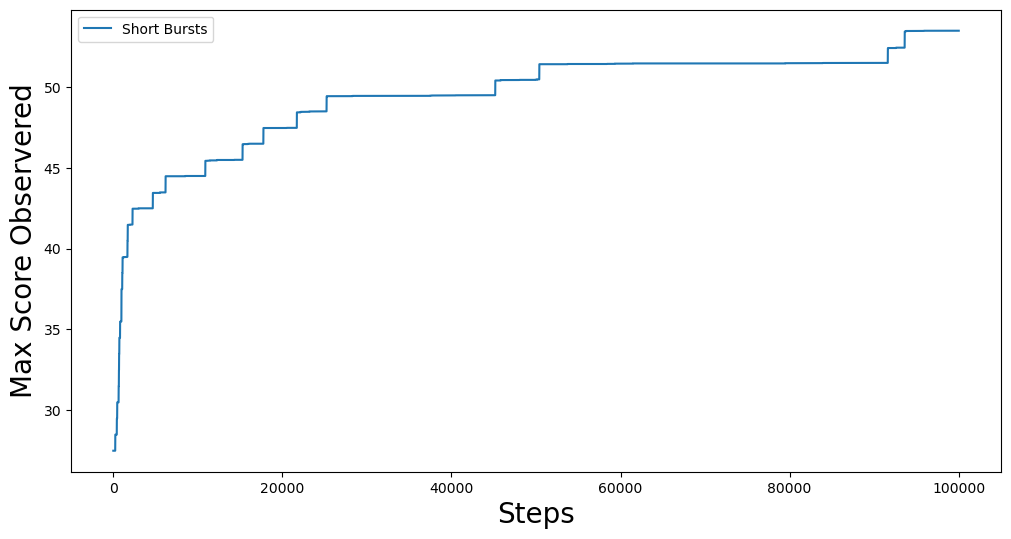

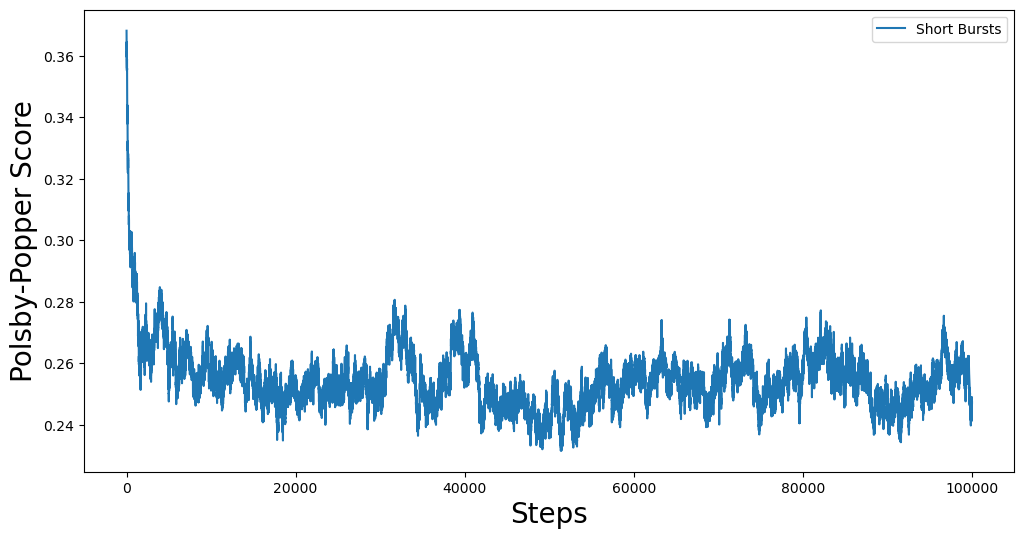

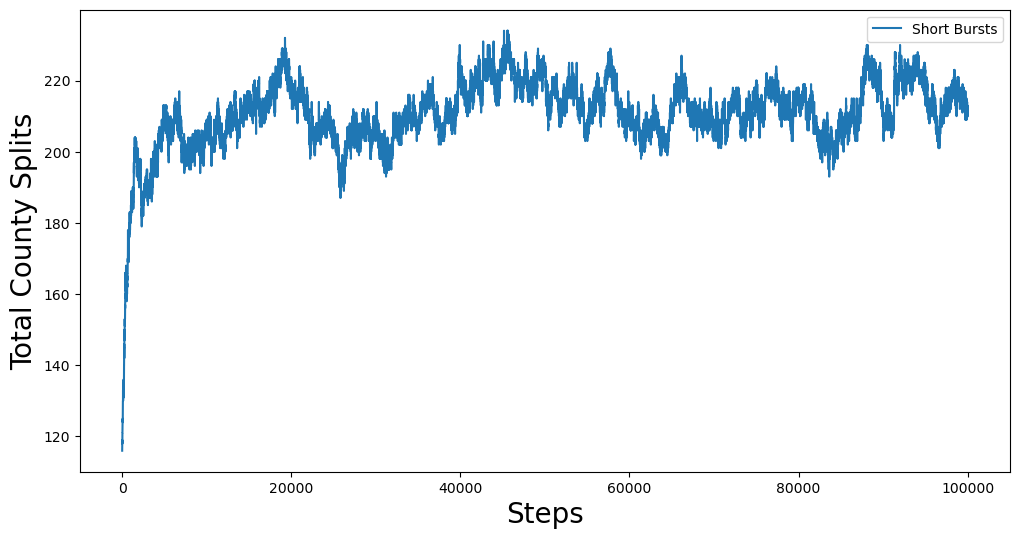

***************************
Starting MS SH
Region-aware: True
***************************


100%|██████████████████████████████████████████████████████████████████████████| 100000/100000 [24:43<00:00, 67.41it/s]


i gingles pp s1 s2
0 27.499 0.3682 51 116
1000 36.5 0.2977 56 130
2000 38.4947 0.3018 61 137
3000 39.499 0.3042 59 134
4000 40.4913 0.3089 57 132
5000 42.4673 0.3093 59 129
6000 43.4926 0.3167 59 125
7000 44.4992 0.3138 56 124
8000 44.4992 0.3023 57 134
9000 45.4745 0.3087 57 127
10000 45.4985 0.3055 61 130
11000 45.4985 0.3049 60 127
12000 45.4985 0.3028 60 130
13000 47.4707 0.3157 57 127
14000 47.4813 0.3194 60 127
15000 47.4813 0.3128 59 126
16000 47.4813 0.3131 61 132
17000 47.4813 0.2994 63 136
18000 47.4813 0.3087 57 128
19000 47.4813 0.3036 61 129
20000 47.4813 0.3026 59 126
21000 47.4813 0.3047 60 131
22000 47.4813 0.2919 61 132
23000 47.4813 0.2961 58 122
24000 47.4813 0.3015 60 124
25000 47.4813 0.3072 61 125
26000 47.4813 0.3105 59 120
27000 47.4813 0.3083 62 130
28000 47.4813 0.3068 60 122
29000 47.4813 0.3094 59 123
30000 47.4813 0.3146 59 118
31000 47.4813 0.3039 58 125
32000 47.4813 0.3081 63 126
33000 47.4813 0.2964 62 122
34000 47.4813 0.3019 64 128
35000 47.4898 0.295

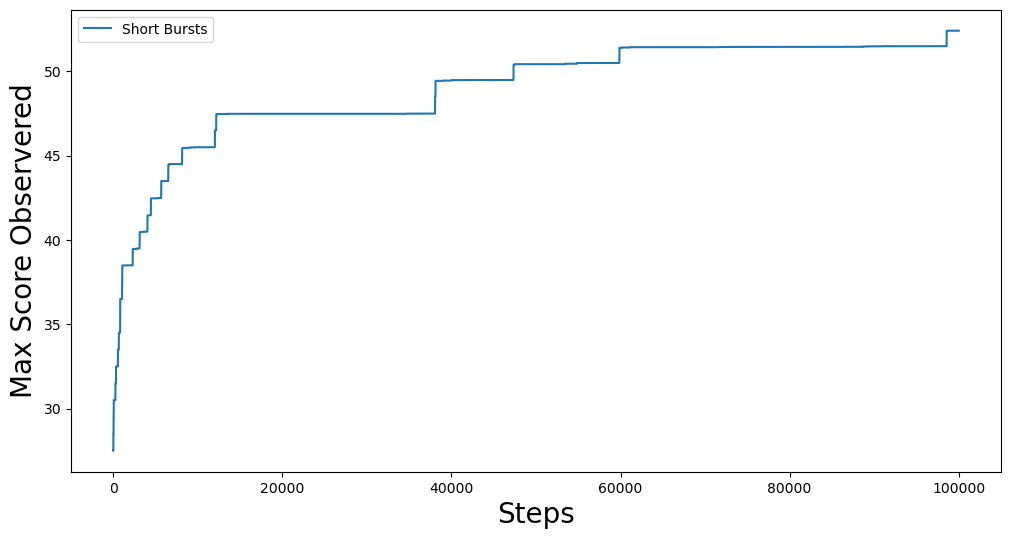

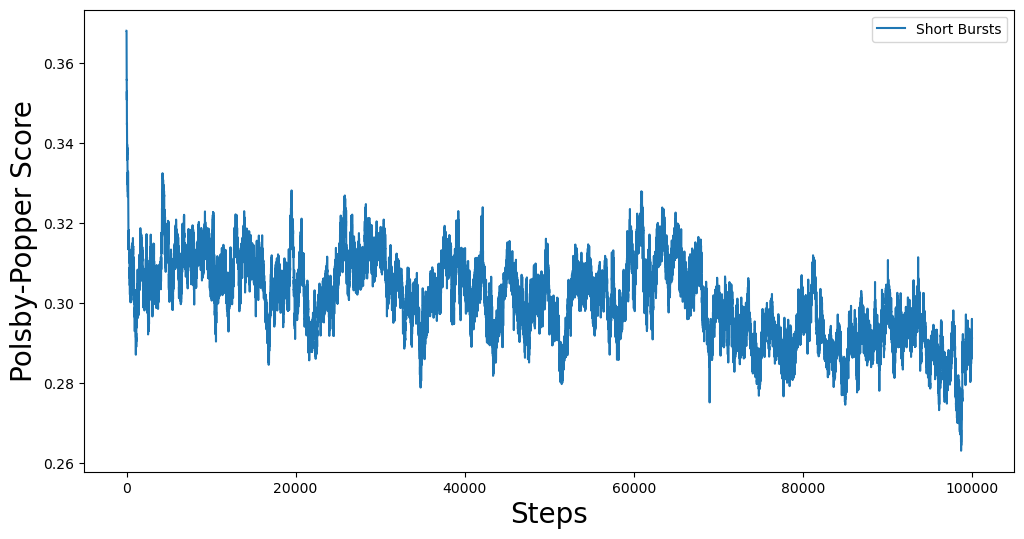

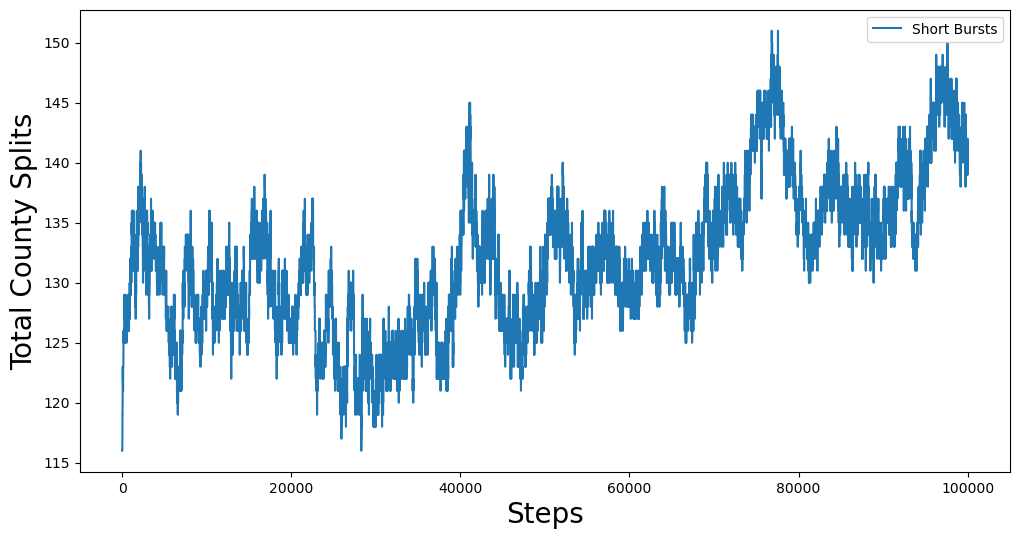

Effectively using k, L, U = 35 136374 150728
Using one split county, attempting to bipartition cluster into sizes: 17 18
Using one split county, attempting to bipartition cluster into sizes: 9 9
Using one split county, attempting to bipartition cluster into sizes: 4 5
Using one split county, attempting to bipartition cluster into sizes: 2 3
Using one split county, attempting to bipartition cluster into sizes: 1 2
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartition cluster into sizes: 2 2
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartition cluster into sizes: 4 5
Using one split county, attempting to bipartition cluster into sizes: 2 3
Using one split county, attempting to bipartition cluster into si

100%|████████████████████████████████████████████████████████████████████████| 100000/100000 [1:11:42<00:00, 23.24it/s]


i gingles pp s1 s2
0 4.4996 0.3412 22 33
1000 6.4863 0.1897 55 101
2000 7.4602 0.1858 58 105
3000 8.3786 0.2014 54 101
4000 8.4186 0.228 56 98
5000 8.4224 0.1781 59 107
6000 8.4369 0.1847 60 102
7000 8.4825 0.1958 58 103
8000 9.3588 0.2096 55 94
9000 9.4056 0.197 49 89
10000 9.4085 0.2017 52 93
11000 9.4085 0.1928 54 96
12000 9.4202 0.1718 56 97
13000 9.4437 0.1793 59 108
14000 9.4456 0.1837 57 103
15000 9.4456 0.2091 49 89
16000 9.4456 0.1901 47 94
17000 9.4456 0.1937 58 104
18000 9.4456 0.1859 50 96
19000 9.4556 0.2063 52 97
20000 9.4556 0.2126 53 98
21000 9.4556 0.2005 59 101
22000 9.4556 0.191 57 93
23000 9.4556 0.1761 55 95
24000 9.4556 0.2012 56 97
25000 9.4556 0.1922 53 97
26000 9.4556 0.1957 56 101
27000 9.4556 0.1975 51 93
28000 9.4556 0.2001 52 100
29000 9.4556 0.2136 50 100
30000 9.4556 0.1962 55 97
31000 9.4556 0.1792 55 100
32000 9.4556 0.1856 52 100
33000 9.4556 0.1859 51 93
34000 9.4567 0.2049 52 95
35000 9.4567 0.1964 51 96
36000 9.4567 0.1927 57 103
37000 9.4567 0.2062

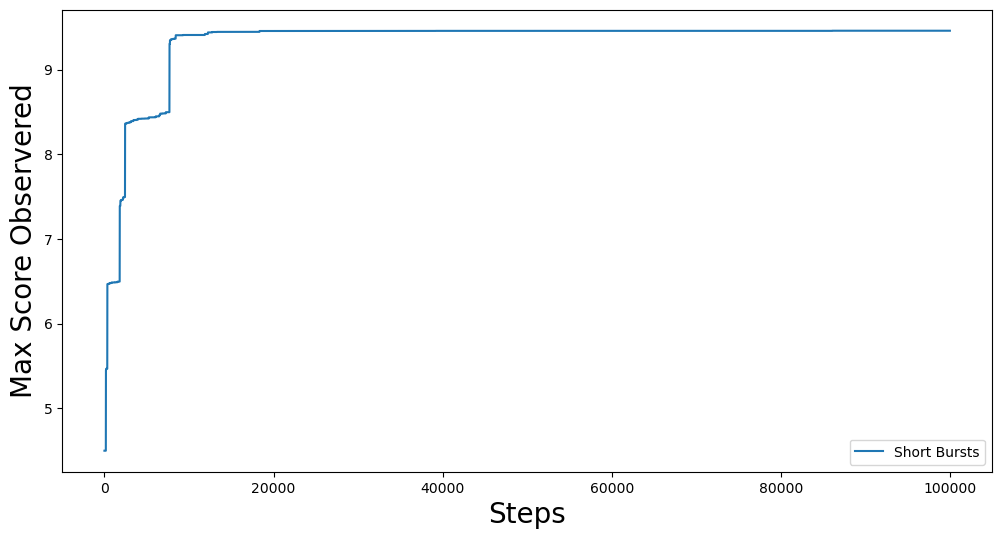

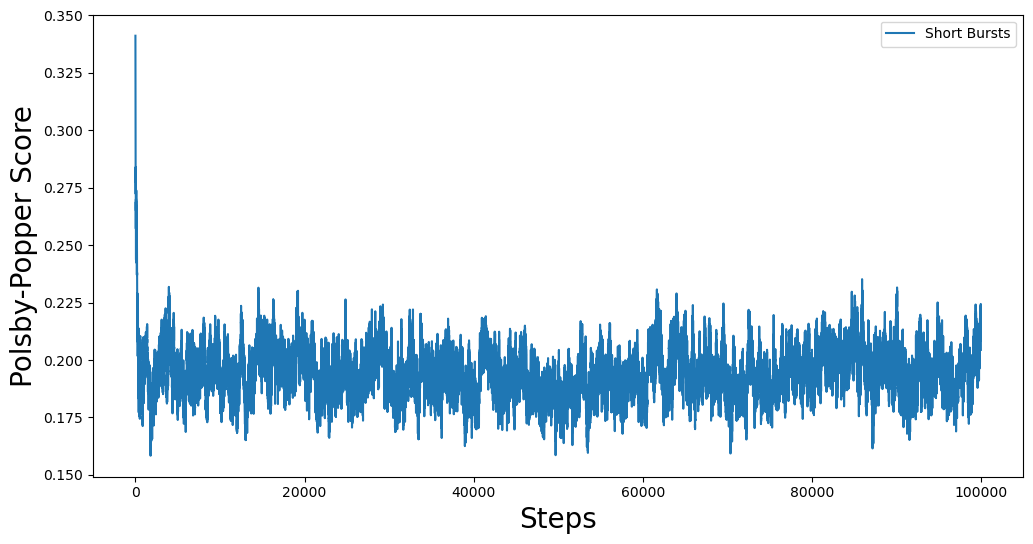

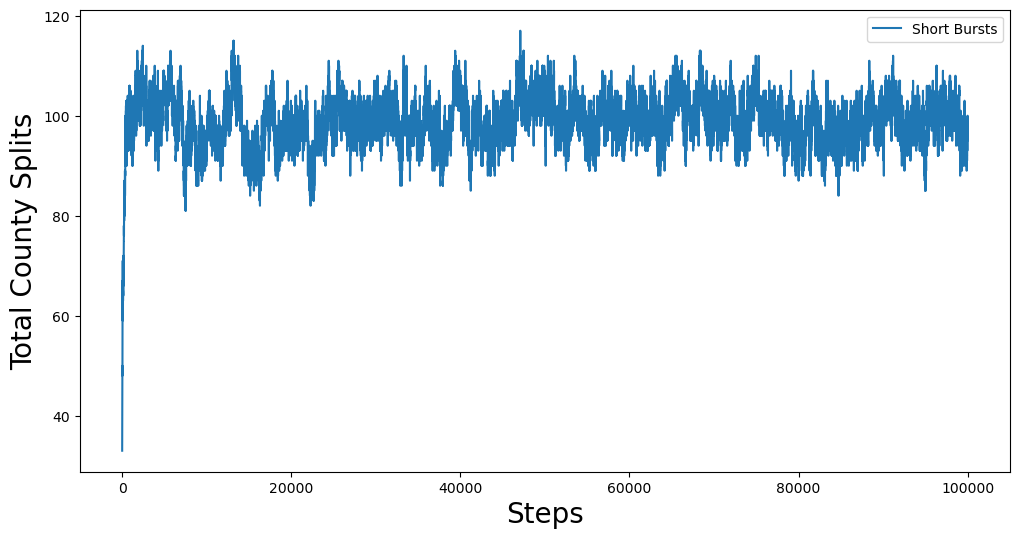

***************************
Starting AL SS
Region-aware: True
***************************


100%|████████████████████████████████████████████████████████████████████████| 100000/100000 [1:06:30<00:00, 25.06it/s]


i gingles pp s1 s2
0 4.4996 0.3412 22 33
1000 6.4862 0.2615 27 42
2000 7.4907 0.2691 28 42
3000 7.4907 0.2782 30 46
4000 7.4907 0.2513 31 47
5000 7.4952 0.2513 32 47
6000 7.4967 0.2849 26 39
7000 8.3955 0.266 27 44
8000 8.3955 0.2589 28 42
9000 8.4215 0.2704 26 43
10000 9.3696 0.2703 28 40
11000 9.3906 0.2712 28 47
12000 9.3943 0.265 26 43
13000 9.4153 0.2365 28 45
14000 9.418 0.2478 30 45
15000 9.4264 0.2453 32 48
16000 9.4456 0.2568 29 44
17000 9.4494 0.2564 30 43
18000 9.4514 0.2473 33 48
19000 9.4514 0.2508 32 54
20000 9.4514 0.2696 32 47
21000 9.4514 0.2553 33 47
22000 9.4514 0.255 31 46
23000 9.4514 0.2661 30 42
24000 9.4514 0.2551 29 43
25000 9.4514 0.2478 28 46
26000 9.4514 0.2772 23 38
27000 9.4514 0.2677 30 44
28000 9.4514 0.2509 30 45
29000 9.4514 0.2729 26 42
30000 9.4518 0.2401 30 42
31000 9.4518 0.2556 29 43
32000 9.4518 0.2559 29 40
33000 9.4518 0.2678 25 38
34000 9.4518 0.2726 25 37
35000 9.4518 0.2354 33 48
36000 9.4518 0.2538 31 46
37000 9.4518 0.2584 21 38
38000 9.45

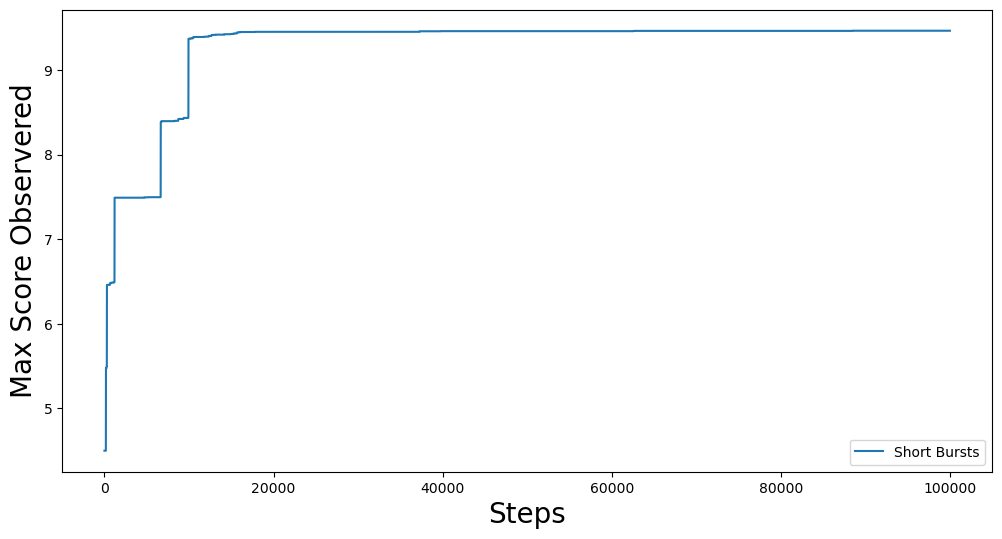

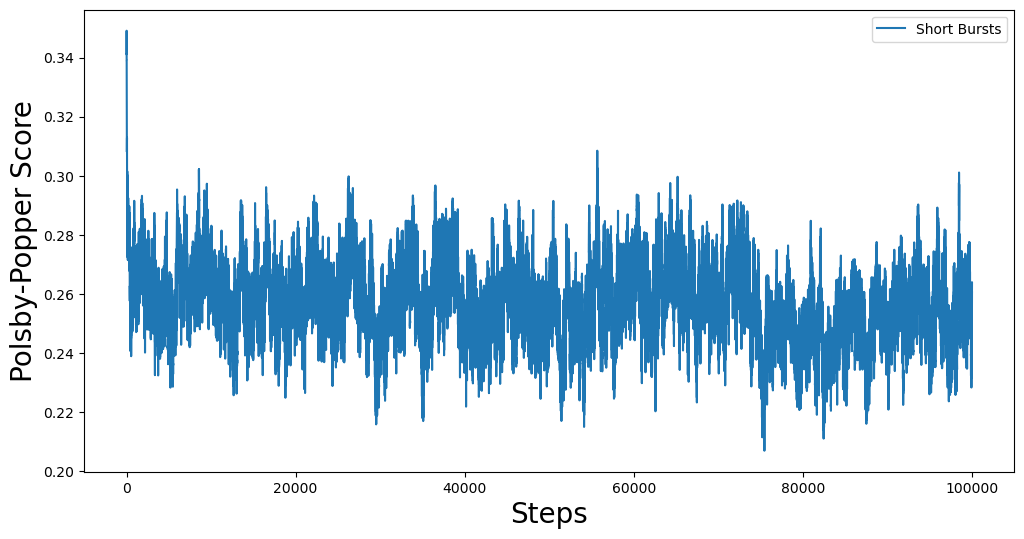

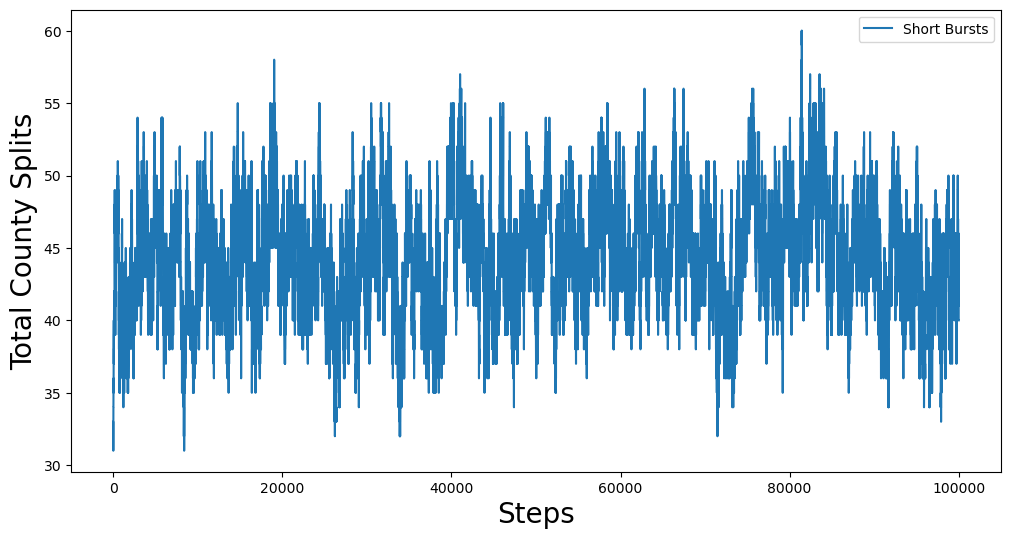

Effectively using k, L, U = 105 45458 50242
Using one split county, attempting to bipartition cluster into sizes: 52 53
Using one split county, attempting to bipartition cluster into sizes: 26 27
Using one split county, attempting to bipartition cluster into sizes: 13 14
Using one split county, attempting to bipartition cluster into sizes: 7 7
Using one split county, attempting to bipartition cluster into sizes: 3 4
Using one split county, attempting to bipartition cluster into sizes: 2 2
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartition cluster into sizes: 1 2
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartition cluster into sizes: 3 4
Using one split county, attempting to bipartition cluster into sizes: 2 2
Using one split county, attempting to bipartition cluster into

100%|██████████████████████████████████████████████████████████████████████████| 100000/100000 [41:21<00:00, 40.30it/s]


i gingles pp s1 s2
0 13.4931 0.3434 40 102
1000 22.4851 0.228 57 181
2000 23.429 0.2314 58 187
3000 23.4572 0.2241 62 191
4000 23.4572 0.2195 61 188
5000 23.4572 0.2208 60 196
6000 23.4916 0.2135 62 198
7000 24.4999 0.2227 61 199
8000 25.4302 0.2194 64 210
9000 26.3726 0.2228 63 204
10000 26.4153 0.2079 58 200
11000 26.4438 0.2187 61 205
12000 26.4897 0.2204 61 198
13000 26.4918 0.2311 64 204
14000 26.4918 0.227 60 194
15000 26.4918 0.2216 61 201
16000 27.3912 0.2204 62 197
17000 27.4404 0.2183 65 205
18000 27.4615 0.2223 62 199
19000 27.4663 0.2193 62 195
20000 27.4791 0.2263 62 200
21000 27.4824 0.2357 59 196
22000 27.4903 0.2143 64 198
23000 27.4989 0.233 59 195
24000 28.3757 0.2193 62 199
25000 28.4458 0.2182 61 191
26000 28.4458 0.2159 64 200
27000 28.4458 0.2282 62 195
28000 28.4458 0.2165 62 192
29000 28.4458 0.2093 63 197
30000 28.4467 0.2089 64 197
31000 28.4467 0.2252 59 190
32000 28.4467 0.2033 58 191
33000 28.4467 0.231 58 187
34000 28.4467 0.2253 63 198
35000 28.4467 0.220

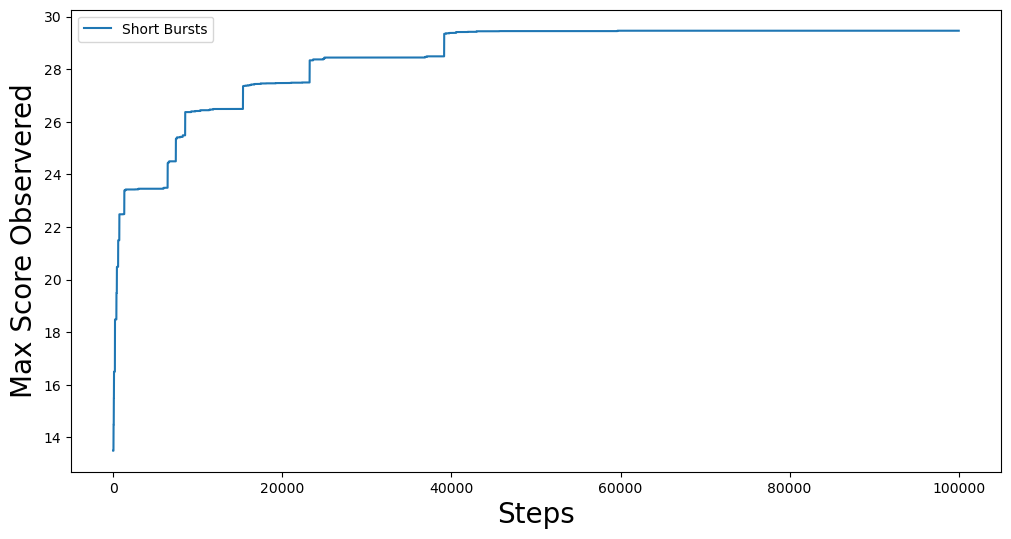

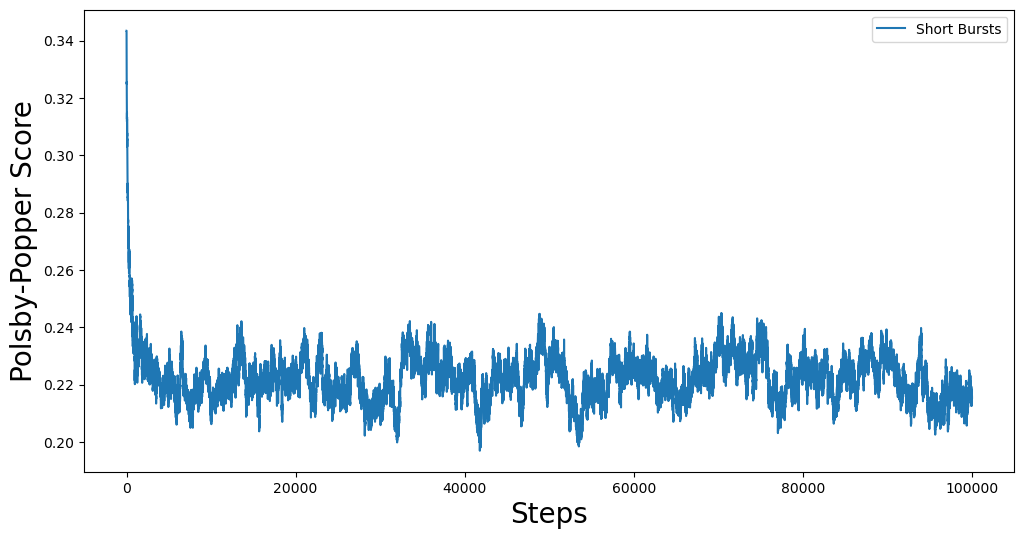

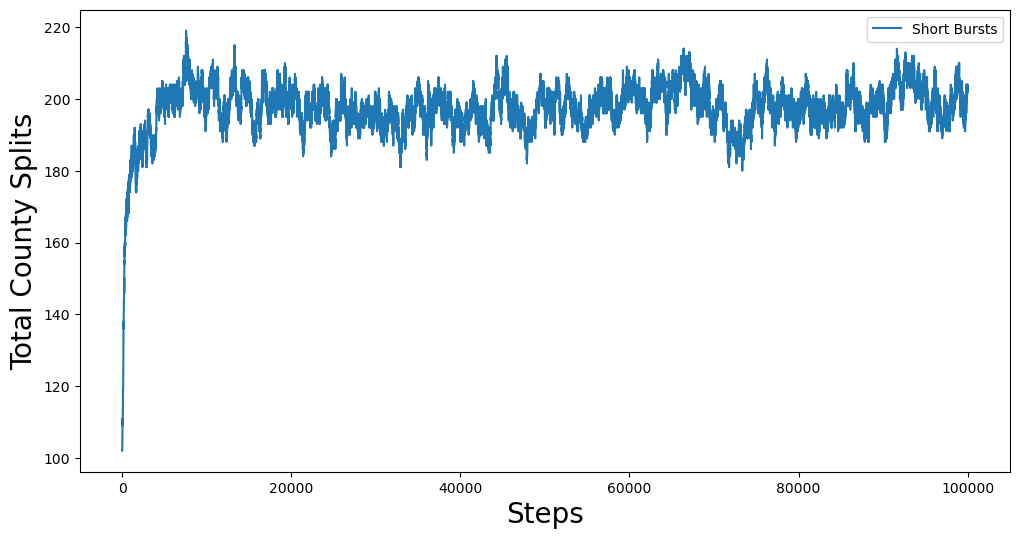

***************************
Starting AL SH
Region-aware: True
***************************


100%|██████████████████████████████████████████████████████████████████████████| 100000/100000 [40:49<00:00, 40.82it/s]


i gingles pp s1 s2
0 13.4931 0.3434 40 102
1000 19.4901 0.2873 41 111
2000 24.4325 0.276 49 123
3000 24.466 0.2653 43 117
4000 24.4748 0.2698 49 121
5000 24.4959 0.2444 47 124
6000 25.4692 0.2693 41 112
7000 25.4905 0.2626 42 121
8000 26.4908 0.2657 44 124
9000 27.4026 0.2707 45 122
10000 27.4062 0.254 46 125
11000 27.4552 0.2665 42 128
12000 27.4603 0.257 42 112
13000 27.474 0.2717 48 123
14000 27.4778 0.2718 44 116
15000 27.4799 0.2732 45 120
16000 27.4859 0.2749 44 118
17000 27.4973 0.2755 45 120
18000 27.4976 0.2639 43 117
19000 28.4302 0.2586 46 117
20000 28.4414 0.2563 49 124
21000 28.4414 0.2545 46 120
22000 28.4453 0.2605 47 122
23000 28.4453 0.2536 44 125
24000 28.4453 0.2694 44 120
25000 28.4485 0.2731 44 120
26000 28.4485 0.2681 45 118
27000 28.4485 0.2601 40 111
28000 28.4485 0.2637 44 114
29000 28.4485 0.2699 47 115
30000 28.4485 0.2733 47 114
31000 28.4541 0.2584 44 115
32000 28.4541 0.2645 46 120
33000 28.4541 0.2565 47 123
34000 28.4541 0.2694 44 123
35000 28.4541 0.275

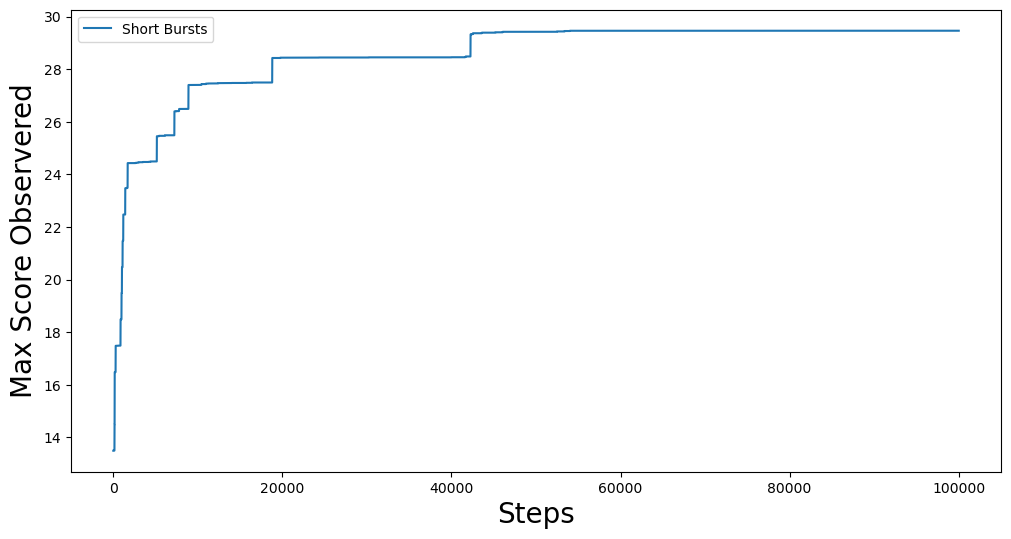

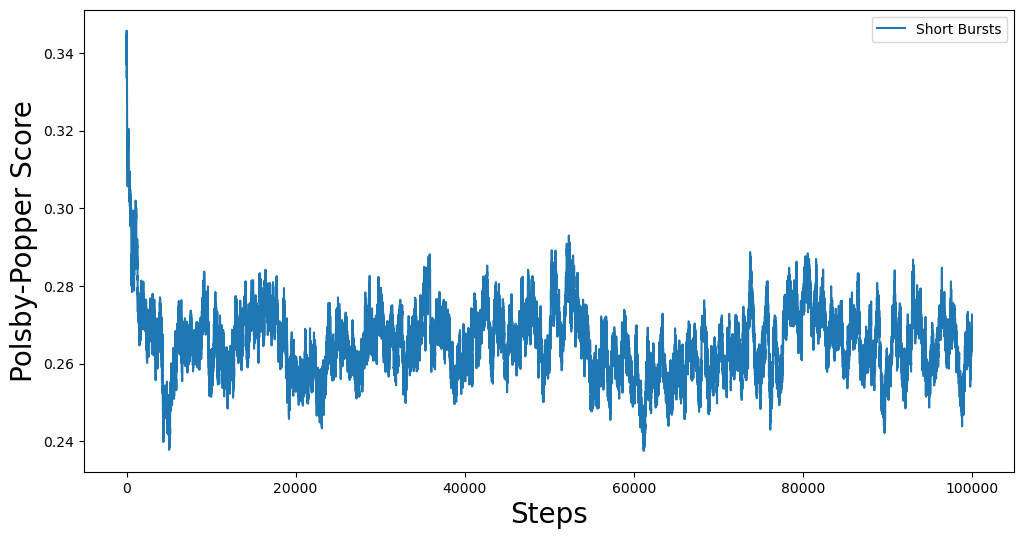

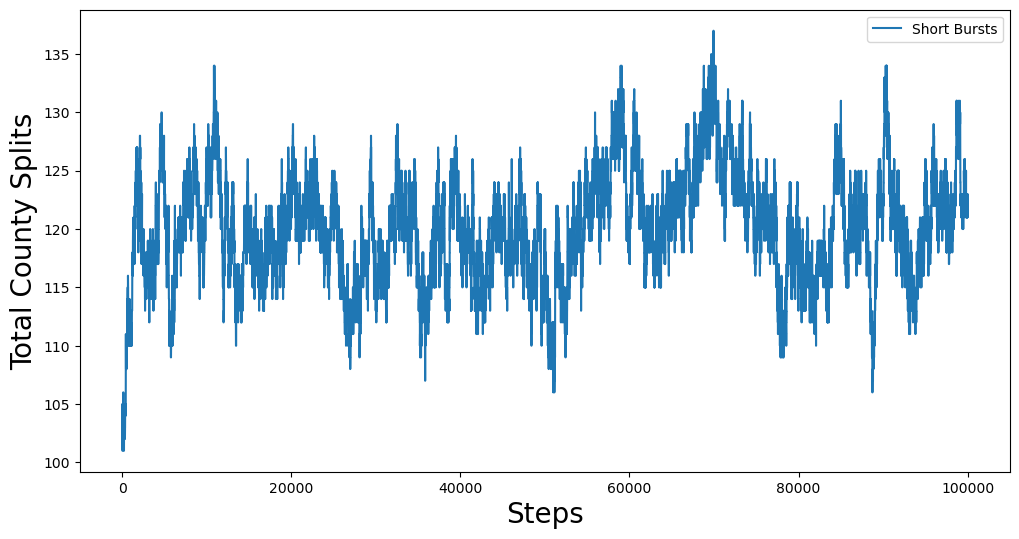

Effectively using k, L, U = 56 181720 200848
Using one split county, attempting to bipartition cluster into sizes: 28 28
Using one split county, attempting to bipartition cluster into sizes: 14 14
Using one split county, attempting to bipartition cluster into sizes: 7 7
Using one split county, attempting to bipartition cluster into sizes: 3 4
Using one split county, attempting to bipartition cluster into sizes: 2 2
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartition cluster into sizes: 1 2
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartition cluster into sizes: 3 4
Using one split county, attempting to bipartition cluster into sizes: 2 2
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartition cluster into 

100%|████████████████████████████████████████████████████████████████████████| 100000/100000 [1:44:51<00:00, 15.89it/s]


i gingles pp s1 s2
0 9.4772 0.3572 34 55
1000 12.4839 0.2019 100 181
2000 13.4912 0.1939 96 184
3000 14.4912 0.1942 98 176
4000 15.4912 0.184 99 185
5000 15.4912 0.1891 95 177
6000 15.4998 0.1901 98 191
7000 16.4212 0.1901 107 189
8000 16.4229 0.1883 99 179
9000 17.4341 0.1983 104 183
10000 17.4545 0.1828 99 183
11000 17.4545 0.1923 99 183
12000 17.4545 0.1773 101 189
13000 17.4545 0.1765 98 183
14000 17.4545 0.1841 97 183
15000 17.4545 0.1839 102 182
16000 17.4545 0.1911 95 179
17000 17.4545 0.1933 102 188
18000 17.4634 0.1854 100 186
19000 17.4634 0.1811 103 195
20000 17.4634 0.1821 96 181
21000 17.4634 0.1847 95 182
22000 17.4634 0.1984 101 183
23000 17.4634 0.1728 110 203
24000 17.4634 0.1936 97 182
25000 17.4634 0.1873 88 168
26000 17.4634 0.1885 98 191
27000 17.4634 0.1943 101 188
28000 17.4634 0.1933 97 178
29000 17.4634 0.173 94 184
30000 17.4634 0.1769 91 175
31000 17.4634 0.1974 96 182
32000 17.4638 0.1808 99 189
33000 17.4638 0.1859 101 183
34000 17.4638 0.1882 98 188
35000 

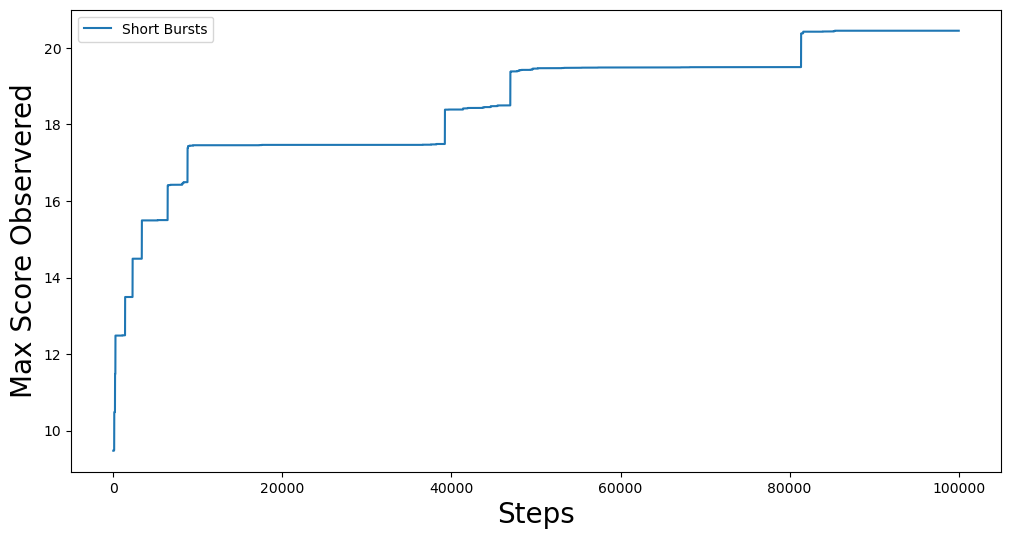

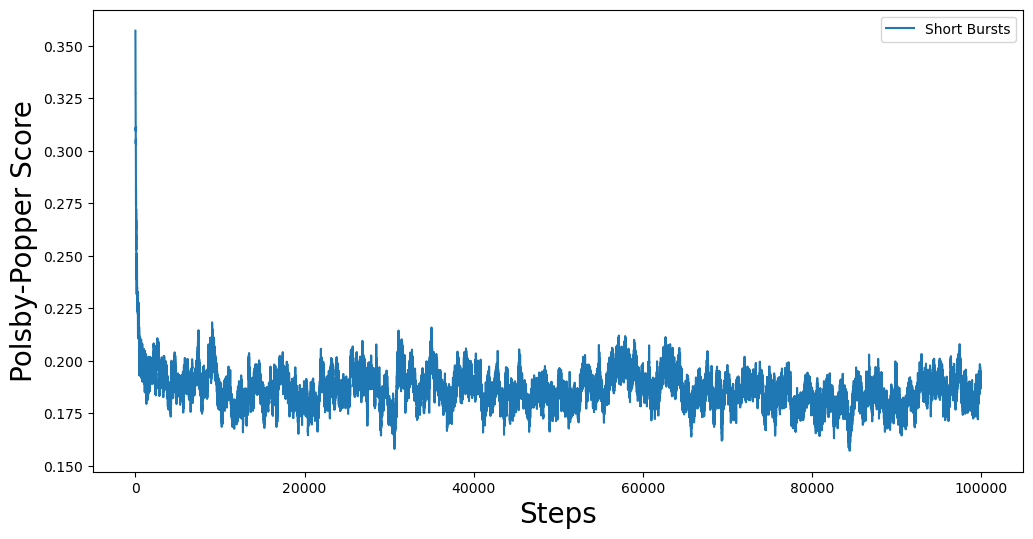

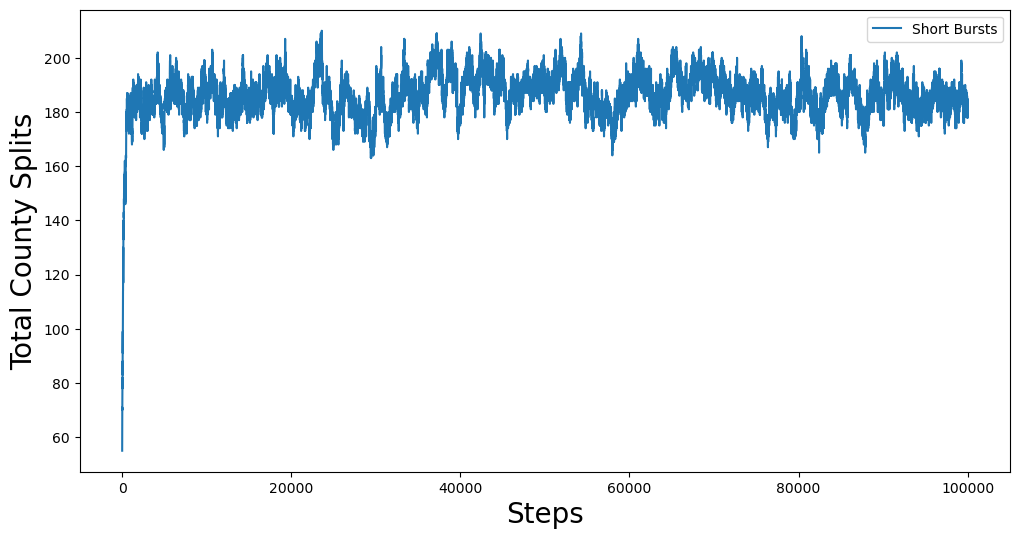

***************************
Starting GA SS
Region-aware: True
***************************


100%|████████████████████████████████████████████████████████████████████████| 100000/100000 [1:32:10<00:00, 18.08it/s]


i gingles pp s1 s2
0 9.4772 0.3572 34 55
1000 13.4918 0.2787 45 73
2000 13.4918 0.2694 42 67
3000 13.4978 0.2655 45 73
4000 14.5 0.247 56 90
5000 16.3952 0.2658 49 82
6000 16.4065 0.2453 52 86
7000 16.4373 0.2544 45 81
8000 16.4417 0.2668 47 85
9000 16.4417 0.2446 46 81
10000 16.445 0.2686 44 84
11000 16.4567 0.2418 49 85
12000 16.4723 0.2548 48 78
13000 16.4897 0.2535 44 74
14000 16.4936 0.2507 50 84
15000 16.4993 0.2447 46 83
16000 17.3969 0.2477 53 87
17000 17.4355 0.2484 52 91
18000 17.4496 0.2451 47 84
19000 17.4514 0.2364 51 80
20000 17.4599 0.2429 50 78
21000 17.4618 0.2433 46 79
22000 17.4618 0.2527 44 73
23000 17.4803 0.2512 49 85
24000 17.487 0.2473 49 88
25000 18.3673 0.2288 59 96
26000 18.4318 0.2433 51 90
27000 18.4467 0.2249 50 89
28000 18.4482 0.2393 48 86
29000 18.4642 0.2484 49 84
30000 18.4824 0.258 49 88
31000 19.3538 0.2571 46 76
32000 19.4411 0.2581 45 74
33000 19.4411 0.25 50 85
34000 19.4411 0.2599 49 78
35000 19.4411 0.2608 47 88
36000 19.4419 0.2537 46 86
37000

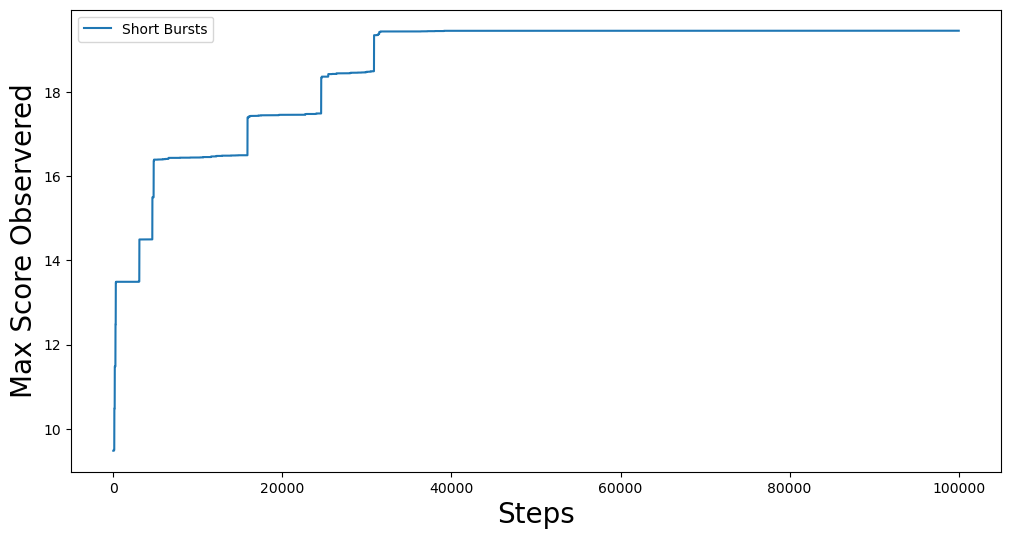

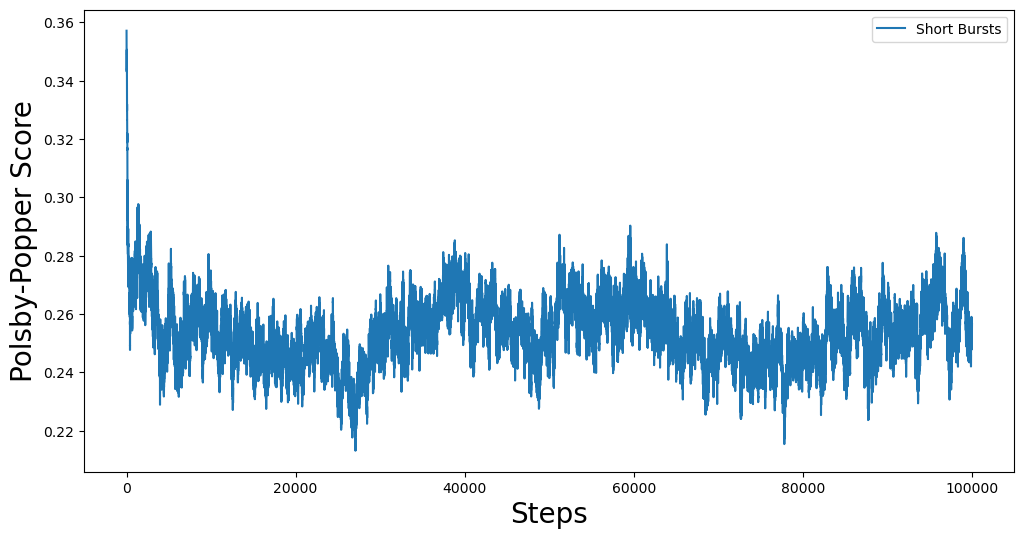

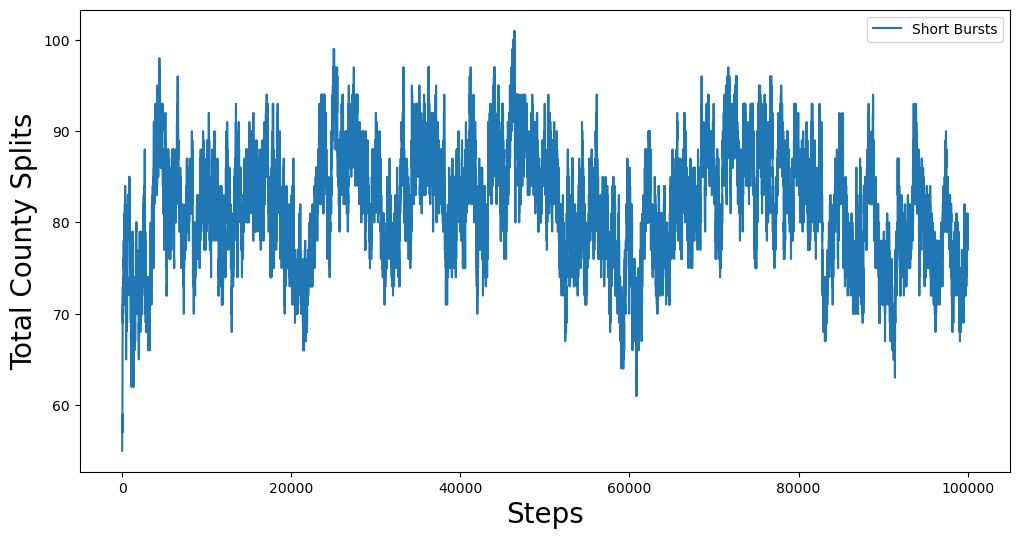

Effectively using k, L, U = 180 56536 62486
Using one split county, attempting to bipartition cluster into sizes: 90 90
Using one split county, attempting to bipartition cluster into sizes: 45 45
Using one split county, attempting to bipartition cluster into sizes: 22 23
Using one split county, attempting to bipartition cluster into sizes: 11 12
Using one split county, attempting to bipartition cluster into sizes: 6 6
Using one split county, attempting to bipartition cluster into sizes: 3 3
Using one split county, attempting to bipartition cluster into sizes: 1 2
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartition cluster into sizes: 1 2
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartition cluster into sizes: 3 3
Using one split county, attempting to bipartition cluster into sizes: 1 2
Using one split county, attempting to bipartition cluster in

100%|████████████████████████████████████████████████████████████████████████| 100000/100000 [1:12:17<00:00, 23.05it/s]


i gingles pp s1 s2
0 35.4901 0.3626 69 174
1000 42.4884 0.2425 119 336
2000 43.4884 0.2429 125 356
3000 45.4884 0.2399 126 365
4000 45.4884 0.2327 131 386
5000 46.4884 0.231 130 379
6000 46.4897 0.2285 125 373
7000 47.4863 0.2288 123 363
8000 48.4486 0.2245 131 376
9000 48.4486 0.2155 130 386
10000 48.4909 0.2264 125 362
11000 51.449 0.2282 129 369
12000 51.4509 0.2333 130 378
13000 51.4675 0.2305 129 383
14000 52.4557 0.2388 129 365
15000 52.465 0.2294 125 375
16000 52.4678 0.2217 124 366
17000 52.4678 0.2348 125 373
18000 52.4678 0.2315 125 372
19000 52.4678 0.2367 120 355
20000 52.4792 0.2294 122 356
21000 52.4917 0.2234 125 365
22000 52.4917 0.2172 129 370
23000 52.4917 0.2216 129 377
24000 52.4917 0.2288 129 379
25000 52.4917 0.2341 131 387
26000 52.4917 0.2265 132 389
27000 52.4917 0.2217 127 370
28000 52.4917 0.2198 126 377
29000 52.4917 0.2273 127 383
30000 52.4995 0.2321 125 371
31000 52.4995 0.2188 125 371
32000 52.4995 0.2195 120 366
33000 52.4995 0.2214 121 373
34000 52.499

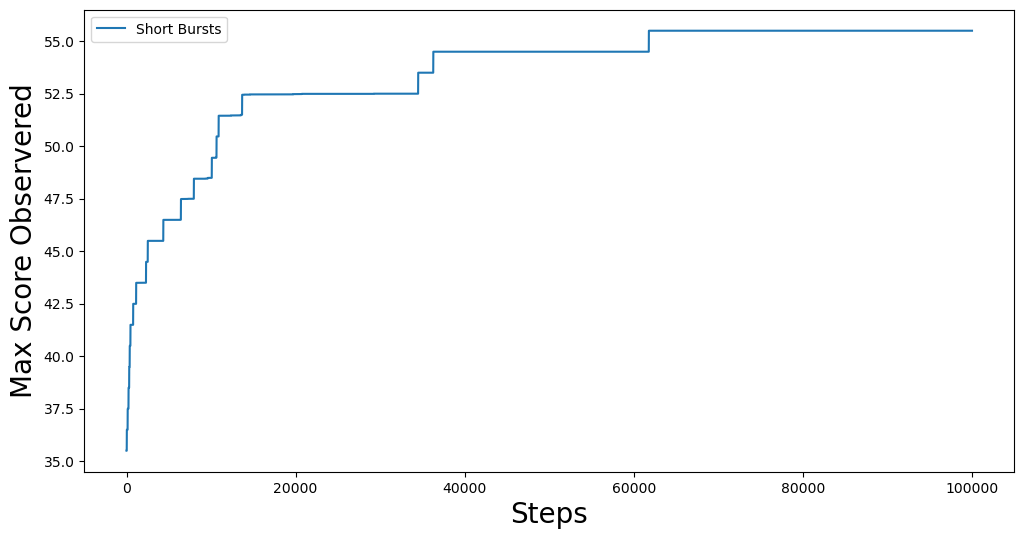

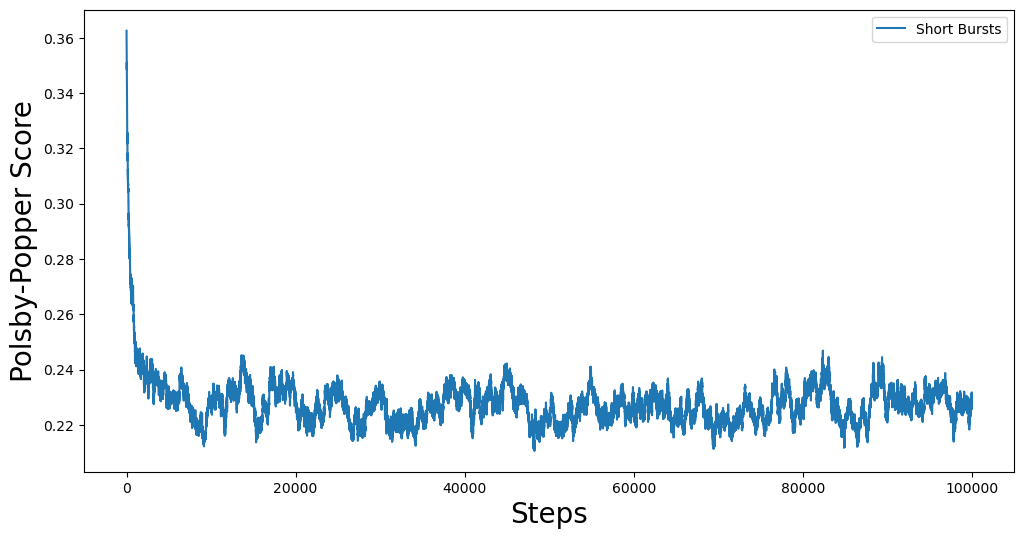

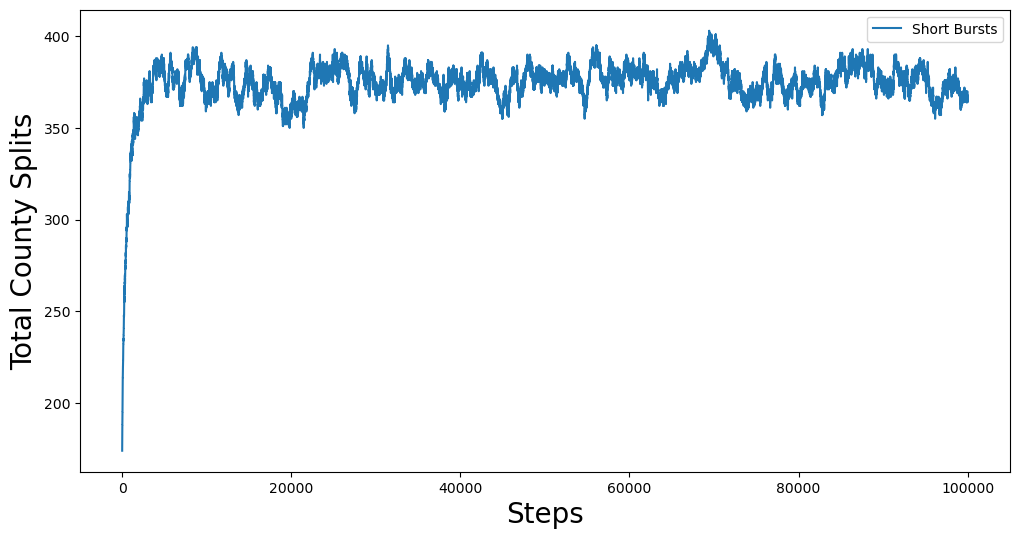

***************************
Starting GA SH
Region-aware: True
***************************


100%|████████████████████████████████████████████████████████████████████████| 100000/100000 [1:09:26<00:00, 24.00it/s]


i gingles pp s1 s2
0 35.4901 0.3626 69 174
1000 40.4973 0.2829 78 204
2000 42.4935 0.2764 78 208
3000 42.4937 0.2803 79 197
4000 43.4835 0.2712 75 198
5000 43.4835 0.2785 80 205
6000 45.4724 0.2839 78 210
7000 46.4818 0.2847 75 199
8000 46.4818 0.2809 77 201
9000 46.4846 0.2657 80 209
10000 47.485 0.2728 81 213
11000 47.485 0.2632 79 217
12000 47.485 0.2628 85 218
13000 47.485 0.2587 86 219
14000 47.485 0.2603 81 209
15000 47.499 0.2673 82 220
16000 47.499 0.2711 85 218
17000 47.499 0.2661 86 222
18000 47.4992 0.2776 83 211
19000 47.4995 0.2684 78 212
20000 48.4764 0.2806 77 202
21000 48.4974 0.2649 79 211
22000 48.4974 0.2714 84 220
23000 48.4974 0.2678 83 216
24000 48.4974 0.2782 84 209
25000 49.4619 0.2687 88 219
26000 49.4823 0.2626 91 222
27000 49.4823 0.2568 87 227
28000 49.4823 0.2649 86 222
29000 49.4923 0.2704 83 220
30000 49.4923 0.2755 74 211
31000 49.4923 0.2665 76 212
32000 49.4928 0.2742 72 208
33000 49.4928 0.2619 73 211
34000 49.4928 0.2645 76 212
35000 49.4928 0.2649 7

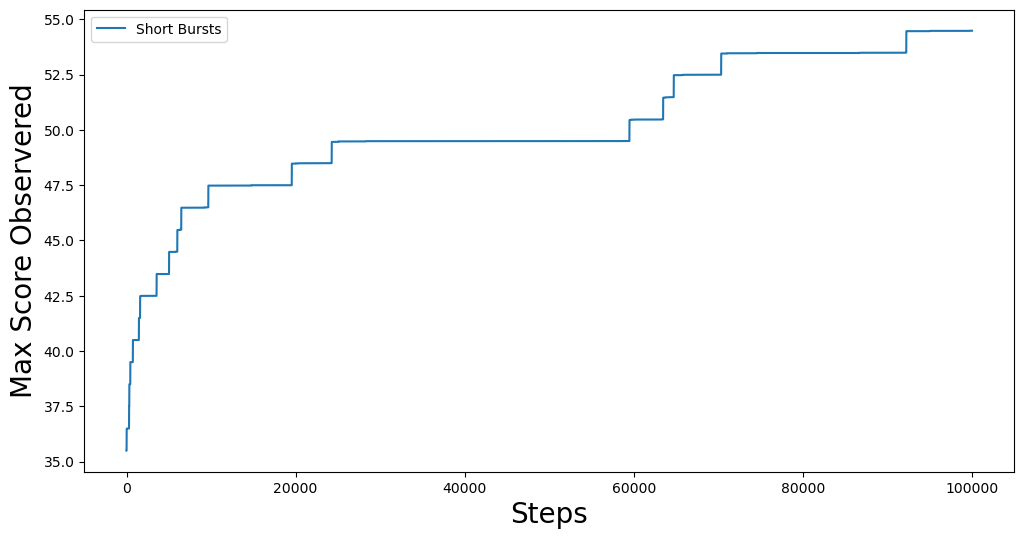

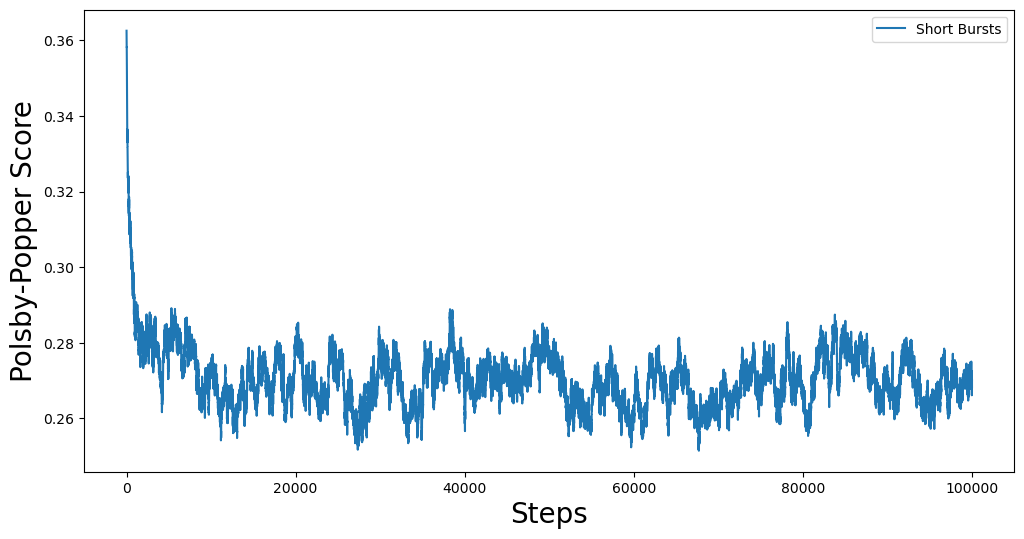

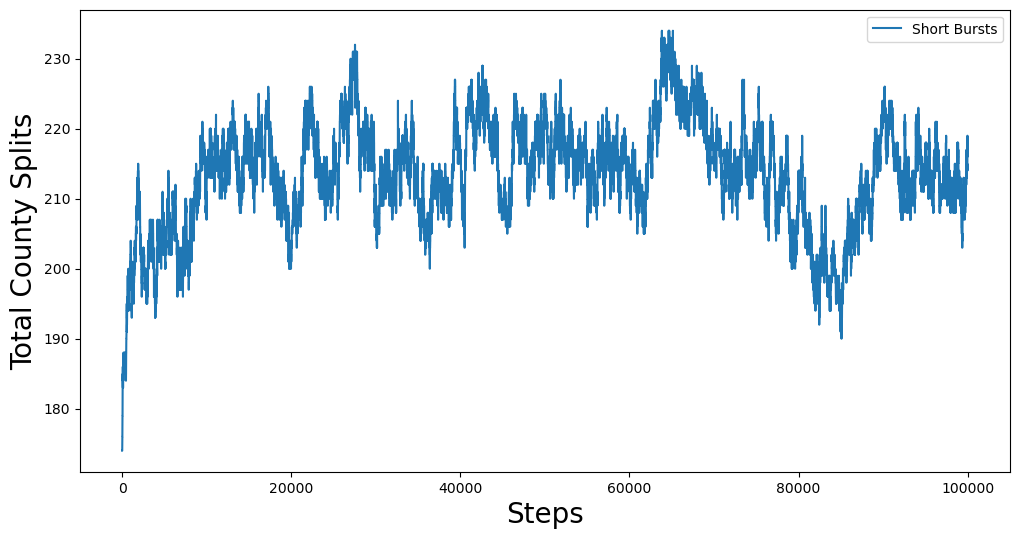

In [4]:
# run experiments

for state in states:
    
    for district_type in district_types:

        # get graph data
        filename = state + '_' + level + ".json"
        G = Graph.from_json(filepath+filename)
        for i in G.nodes:
            G.nodes[i]['TOTPOP'] = G.nodes[i]['P0010001']
            G.nodes[i]['VAP'] = G.nodes[i]['P0030001']
            G.nodes[i]['MVAP'] = sum( G.nodes[i][code] for code in codes )
        
        # set population parameters
        k = number_of_districts[state,district_type]
        total_population = sum( G.nodes[i]['TOTPOP'] for i in G.nodes )
        ideal_population = total_population / k
        L = math.ceil( ideal_population * (1-deviation/2) )
        U = math.floor( ideal_population * (1+deviation/2) )
        print("Effectively using k, L, U =",k,L,U)

        # get initial plan
        DG = nx.DiGraph(G)
        DG._k = k
        DG._L = L
        DG._U = U
        mip_districts = recursive_bipartition_heuristic(DG)
        mip_labeling = { i : j for j in range(k) for i in mip_districts[j] }
        
        for region_aware in {False, True}:

            print("***************************")
            print("Starting",state,district_type)
            print("Region-aware:",region_aware)
            print("***************************")
            
            # GerryChain/ShortBursts/Gingleator setup
            chain_updaters = {
            "population": updaters.Tally("TOTPOP", alias="population"),
            "VAP": updaters.Tally("VAP"),
            "MVAP": updaters.Tally("MVAP")
            }
            
            initial_partition = Partition(graph=G,
                assignment=mip_labeling,
            updaters=chain_updaters
            )

            my_surcharge = 0.5 if region_aware else 0.0
            proposal = partial(
                proposals.recom,
                pop_col="TOTPOP",
                pop_target=ideal_population,
                epsilon=deviation/2,
                node_repeats=1,
                region_surcharge={"COUNTY": my_surcharge}
            )
            
            constraints = constraints_class.within_percent_of_ideal_population(initial_partition, deviation/2)
                
            gingles = Gingleator(
                proposal,
                constraints,
                initial_partition,
                minority_pop_col="MVAP",
                total_pop_col="VAP",
                score_function=Gingleator.reward_partial_dist
            )
    
            # run short bursts
            max_scores_sb = np.zeros(total_steps)
            scores_sb = np.zeros(total_steps)
            pp = np.zeros(total_steps)
            s1 = np.zeros(total_steps)
            s2 = np.zeros(total_steps)
            
            incumbent_plan = mip_districts.copy()
            incumbent_i = -1
            for i, part in enumerate(gingles.short_bursts(burst_length, num_bursts, with_progress_bar=True)):
                max_scores_sb[i] = gingles.best_score
                scores_sb[i] = gingles.score(part)
                districts = [ list() for j in range(k) ]
                for v in G.nodes:
                    j = part.assignment[v]
                    districts[j].append(v)
                s1[i] = number_of_counties_split(G, districts)
                s2[i] = number_of_county_splits(G, districts)
                pp[i] = average_polsby_popper(G, districts)
                
                # update incumbent?
                case1 = math.floor( scores_sb[i] ) > math.floor( scores_sb[incumbent_i] )
                case2 = math.floor( scores_sb[i] ) == math.floor( scores_sb[incumbent_i] )
                case3 = pp[i] > pp[incumbent_i] 
                if case1 or (case2 and case3):
                    incumbent_i = i
                    incumbent_plan = districts.copy()
    
            # reporting
            print("i gingles pp s1 s2")
            for i in range(total_steps):
                if i%1000==0:
                    print(i,round(scores_sb[i], 4), round(pp[i],4), round(s1[i]), round(s2[i]))
    
            print("incumbent_plan_"+state+"_"+district_type+" =",incumbent_plan)
            report_metrics(G, incumbent_plan, minority)
    
            fig, ax = plt.subplots(figsize=(12,6))
            plt.plot(max_scores_sb, label="Short Bursts")
            plt.xlabel("Steps", fontsize=20)
            plt.ylabel("Max Score Observered", fontsize=20)
            plt.legend()
            plt.show()
    
            fig, ax = plt.subplots(figsize=(12,6))
            plt.plot(pp, label="Short Bursts")
            plt.xlabel("Steps", fontsize=20)
            plt.ylabel("Polsby-Popper Score", fontsize=20)
            plt.legend()
            plt.show()
    
            fig, ax = plt.subplots(figsize=(12,6))
            plt.plot(s2, label="Short Bursts")
            plt.xlabel("Steps", fontsize=20)
            plt.ylabel("Total County Splits", fontsize=20)
            plt.legend()
            plt.show()